##### list of experiment:
- EXP1: std algorithm, node doubled, partition generated
- EXP2: std algorithm, node doubled, partition fixed to 10 community
- EXP3: std algorithm, partition doubled, graph fixed to 2expnode(n=20480, m=50000).graph
- EXP4: std algorithm, edge doubled, partition generated
- EXP5 undirected algorithm, node doubled, partition fixed to 10 community
- EXP6 undirected algorithm, partition doubled, graph fixed to 2expnode(n=20480, m=50000).graph
- EXP7 undirected algorithm, edge doubled, partition generated

In [1]:
import networkit as nk
import numpy as np
import pandas as pd
import re
from networkit.graphio import BinaryPartitionReader
import matplotlib.pyplot as plt

In [2]:
all_data = pd.read_csv("../results/time.csv", sep=";")
all_data

,Code,Graph,Partition,Flag,Community computation,Nodes computation,GLR computation,Total
0,python,"2expnode(n=5120, m=50000).graph",NaN,2expnode,0.249632,0.810747,19.468141,19.469360
1,python,"2expnode(n=10240, m=50000).graph",NaN,2expnode,0.457549,2.529974,66.076160,66.081450
2,python,"2expnode(n=640, m=50000).graph",NaN,2expnode,0.020755,0.051101,1.059860,1.060017
3,python,"2expnode(n=40960, m=50000).graph",NaN,2expnode,0.757963,20.458904,593.701867,593.732502
4,python,"2expnode(n=2560, m=50000).graph",NaN,2expnode,0.021359,0.394145,7.887121,7.887537
...,...,...,...,...,...,...,...,...
515,C++,"2expedge(n=640, m=10224).graph",NaN,2expedgeundirected,0.005593,0.009684,0.009962,0.009976
516,C++,"2expedge(n=640, m=10224).graph",NaN,2expedgeundirected,0.031627,0.036271,0.036510,0.036523
517,C++,"2expedge(n=640, m=10224).graph",NaN,2expedgeundirected,0.026742,0.036415,0.036739,0.036757
518,C++,"2expedge(n=640, m=10224).graph",NaN,2expedgeundirected,0.029221,0.033970,0.034325,0.034346


In [3]:
pattern = r"n=(\d+),\s*m=(\d+)"
all_data["n"] = all_data['Graph'].apply(lambda graph_name: int(re.search(pattern, graph_name).group(1)))
all_data["m"] = all_data['Graph'].apply(lambda graph_name: int(re.search(pattern, graph_name).group(2)))

In [4]:
all_data["deltaNodesComputation"] = all_data["Nodes computation"] - all_data["Community computation"]
all_data["deltaGLR"] = all_data["GLR computation"] - all_data["Nodes computation"]

In [5]:
grouped = all_data.groupby(['Code', 'Graph', 'Flag', 'Partition', 'n', 'm'], as_index=False, dropna=False)
all_data = grouped.mean()
all_data

,Code,Graph,Flag,Partition,n,m,Community computation,Nodes computation,GLR computation,Total,deltaNodesComputation,deltaGLR
0,C++,"2expedge(n=640, m=10224).graph",2expedge,NaN,640,10224,0.436834,0.453034,1.118107,1.118243,0.016200,0.665073
1,C++,"2expedge(n=640, m=10224).graph",2expedgeundirected,NaN,640,10224,0.018455,0.023471,0.023776,0.023793,0.005016,0.000305
2,C++,"2expedge(n=640, m=1278).graph",2expedge,NaN,640,1278,0.006216,0.022540,0.237181,0.237335,0.016324,0.214641
3,C++,"2expedge(n=640, m=1278).graph",2expedgeundirected,NaN,640,1278,0.016543,0.020193,0.020487,0.020512,0.003650,0.000294
4,C++,"2expedge(n=640, m=163584).graph",2expedge,NaN,640,163584,0.040110,0.086369,5.495393,5.495569,0.046259,5.409024
...,...,...,...,...,...,...,...,...,...,...,...,...
101,python,"2expnode(n=5120, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,5120,50000,0.056638,0.656639,16.195146,16.195926,0.600000,15.538508
102,python,"2expnode(n=5120, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,5120,50000,0.022857,0.692653,0.748375,0.750087,0.669797,0.055722
103,python,"2expnode(n=640, m=50000).graph",2expnode,NaN,640,50000,0.020755,0.051101,1.059860,1.060017,0.030346,1.008759
104,python,"2expnode(n=640, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,640,50000,0.013811,0.076439,1.056673,1.056838,0.062629,0.980234


# Statistics

In [6]:
statistics = grouped.describe()

# Select programming language to show results for

In [7]:
programming_language = "C++" # python/C++

# Utility function

In [8]:
def plot_column(df, column_names, num_row=1, num_colum=1, one_ax=False, figsize=(20,8)):
    if one_ax:
        _, axes = plt.subplots(1, 1, figsize=figsize)
    else:
        _, axes = plt.subplots(num_row, num_colum, figsize=figsize)
    for i in range(len(column_names)):
        ax=axes 
        column_name = column_names[i]
        if (num_row, num_colum) != (1,1) and not one_ax:
           ax = axes[i] 
        if not one_ax:
            ax.set_ylabel(column_name)
        df[column_name].plot(marker="o", ax=ax, label=column_name)
    if one_ax:
         axes.legend()
    plt.show()

# Programming Language Comparison (EXP1)

##### Filter results

In [9]:
all_comparison = all_data[ all_data["Flag"] == "2expnode"]

In [10]:
py_comparison = all_comparison[ all_comparison["Code"] == "python"]
py_comparison = py_comparison.drop(columns=["Code", "m"])
cpp_comparison = all_comparison[ all_comparison["Code"] == "C++"]
cpp_comparison = cpp_comparison.drop(columns=["Code", "m"])

comparison = pd.merge(py_comparison, cpp_comparison, how="inner", on=["n", "Graph", "Partition", "Flag"], suffixes=("_py", "_cpp"))
comparison

,Graph,Flag,Partition,n,Community computation_py,Nodes computation_py,GLR computation_py,Total_py,deltaNodesComputation_py,deltaGLR_py,Community computation_cpp,Nodes computation_cpp,GLR computation_cpp,Total_cpp,deltaNodesComputation_cpp,deltaGLR_cpp
0,"2expnode(n=10240, m=50000).graph",2expnode,NaN,10240,0.457549,2.529974,66.076160,66.081450,2.072425,63.546186,0.172034,0.634378,92.471686,92.473924,0.462344,91.837308
1,"2expnode(n=1280, m=50000).graph",2expnode,NaN,1280,0.054334,0.224641,1.643777,1.644040,0.170307,1.419136,0.035937,0.094207,1.564179,1.564362,0.058270,1.469972
2,"2expnode(n=20480, m=50000).graph",2expnode,NaN,20480,0.588773,7.666712,180.451038,180.457450,7.077939,172.784326,0.265604,1.385899,349.597689,349.602380,1.120295,348.211790
3,"2expnode(n=2560, m=50000).graph",2expnode,NaN,2560,0.021359,0.394145,7.887121,7.887537,0.372787,7.492976,0.057544,0.142087,9.485665,9.486185,0.084543,9.343578
4,"2expnode(n=40960, m=50000).graph",2expnode,NaN,40960,0.757963,20.458904,593.701867,593.732502,19.700940,573.242964,0.386909,4.343140,648.247755,648.258891,3.956231,643.904615
5,"2expnode(n=5120, m=50000).graph",2expnode,NaN,5120,0.249632,0.810747,19.468141,19.469360,0.561116,18.657394,0.090647,0.366563,28.803762,28.804764,0.275916,28.437199
6,"2expnode(n=640, m=50000).graph",2expnode,NaN,640,0.020755,0.051101,1.059860,1.060017,0.030346,1.008759,0.011232,0.046830,1.276260,1.276348,0.035598,1.229430


##### Set number of nodes as ID

In [11]:
comparison.set_index("n", inplace=True)
comparison.sort_index(inplace=True)

##### Compare total time

In [12]:
comparison.filter(regex='Total')

,Total_py,Total_cpp
n,,
640,1.060017,1.276348
1280,1.644040,1.564362
2560,7.887537,9.486185
5120,19.469360,28.804764
10240,66.081450,92.473924
20480,180.457450,349.602380
40960,593.732502,648.258891


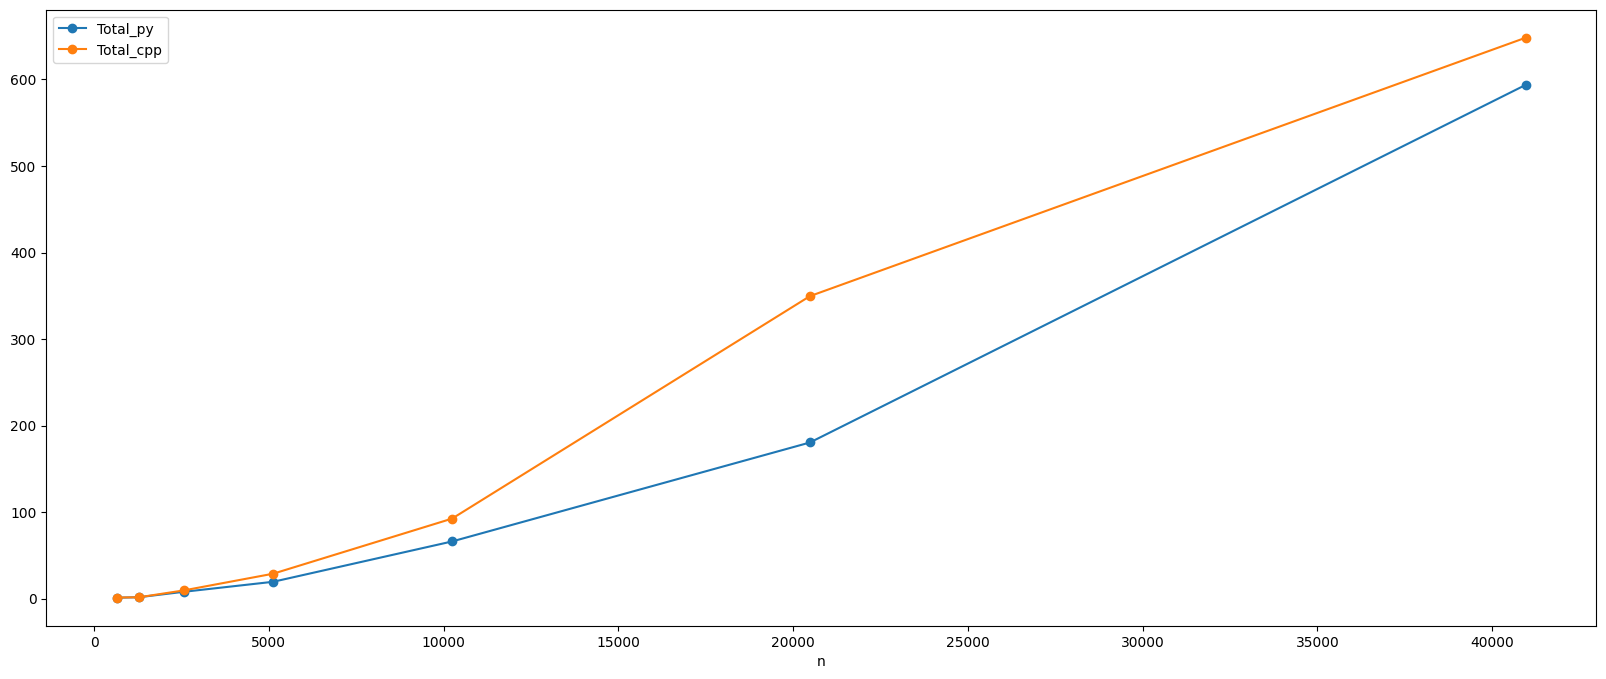

In [13]:
plot_column(comparison, ['Total_py', 'Total_cpp'], one_ax=True)

##### Compare partitionsComputation

In [14]:
comparison.filter(regex="Community computation")

,Community computation_py,Community computation_cpp
n,,
640,0.020755,0.011232
1280,0.054334,0.035937
2560,0.021359,0.057544
5120,0.249632,0.090647
10240,0.457549,0.172034
20480,0.588773,0.265604
40960,0.757963,0.386909


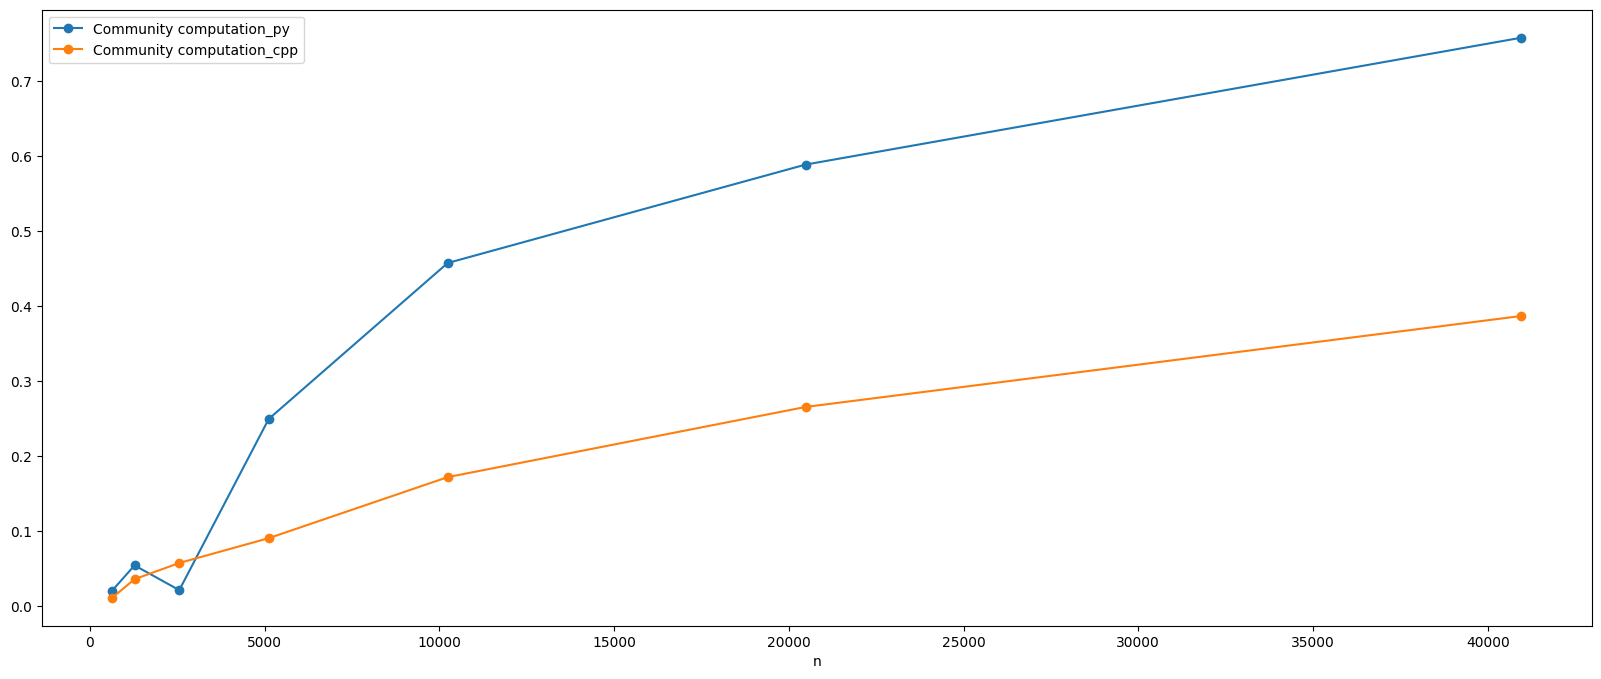

In [15]:
plot_column(comparison, ['Community computation_py', 'Community computation_cpp'], one_ax=True)

##### Compare nodesComputation

In [16]:
comparison.filter(regex="deltaNodesComputation")

,deltaNodesComputation_py,deltaNodesComputation_cpp
n,,
640,0.030346,0.035598
1280,0.170307,0.058270
2560,0.372787,0.084543
5120,0.561116,0.275916
10240,2.072425,0.462344
20480,7.077939,1.120295
40960,19.700940,3.956231


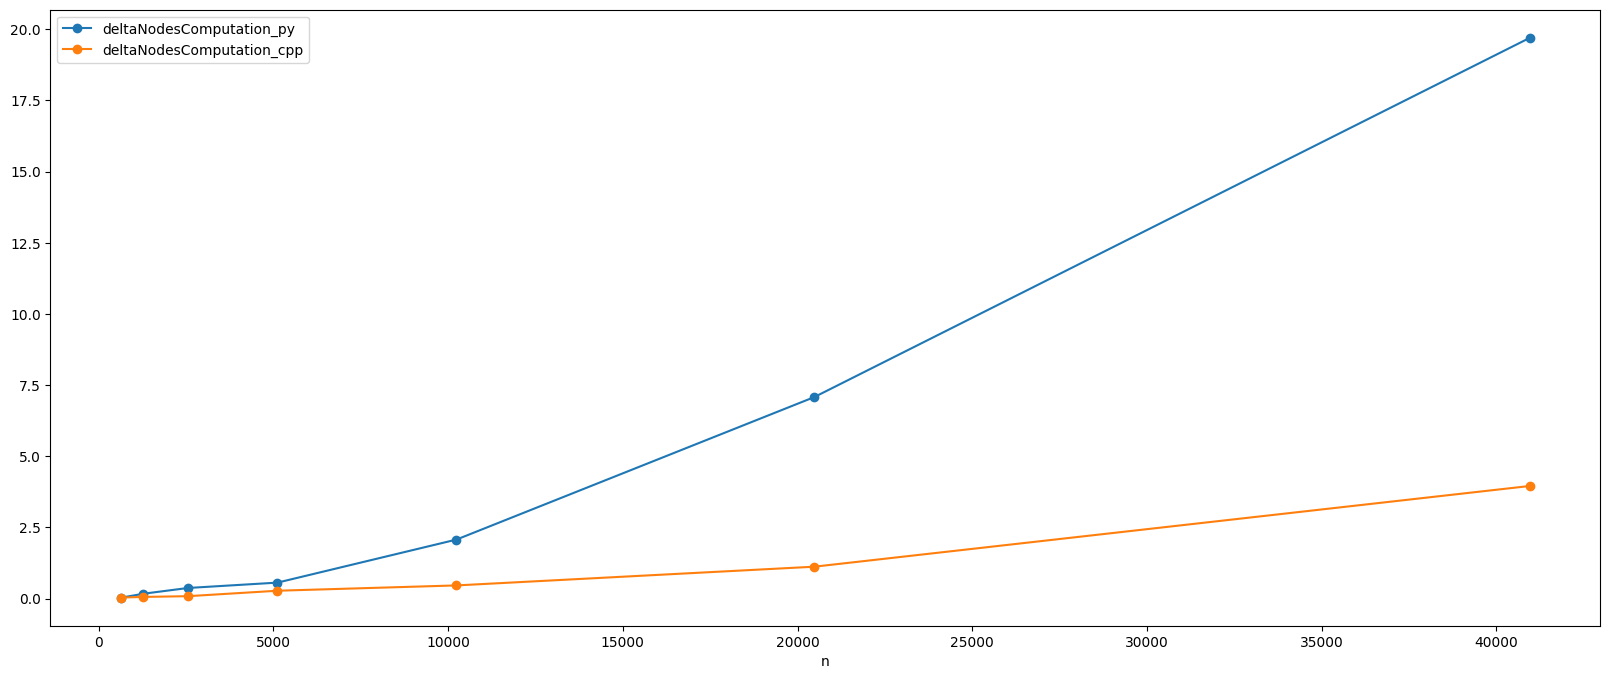

In [17]:
plot_column(comparison, ['deltaNodesComputation_py', 'deltaNodesComputation_cpp'], one_ax=True)

##### Compare deltaGLR

In [18]:
comparison.filter(regex="deltaGLR")

,deltaGLR_py,deltaGLR_cpp
n,,
640,1.008759,1.229430
1280,1.419136,1.469972
2560,7.492976,9.343578
5120,18.657394,28.437199
10240,63.546186,91.837308
20480,172.784326,348.211790
40960,573.242964,643.904615


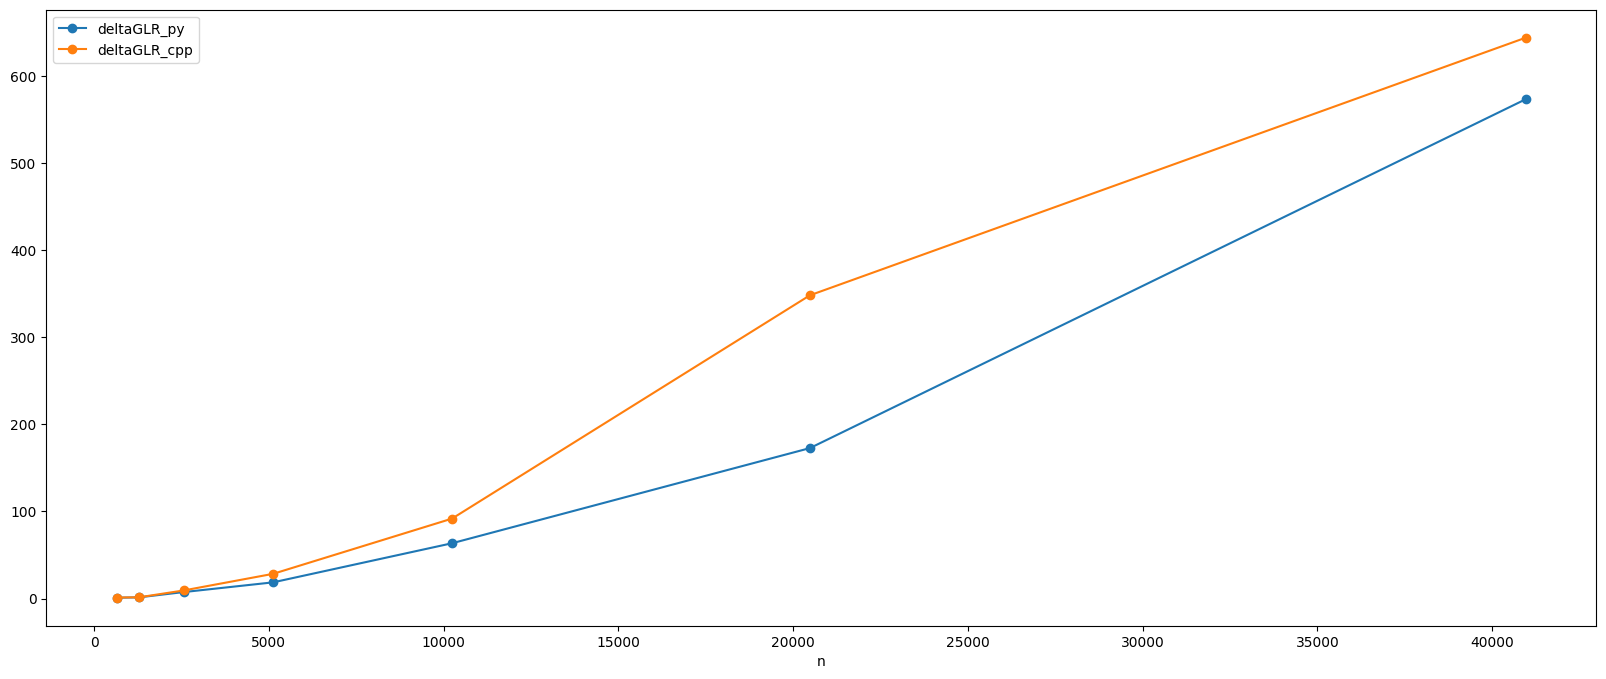

In [19]:
plot_column(comparison, ['deltaGLR_py', 'deltaGLR_cpp'], one_ax=True)

# Double Experiment (EXP1)

##### Filter results

In [20]:
dexpnode = all_data[ all_data["Flag"] == "2expnode"]
dexpnode = dexpnode[dexpnode["Code"] == programming_language]

##### Set number of nodes as ID

In [21]:
dexpnode.set_index("n", inplace=True)
dexpnode.sort_index(inplace=True)

##### Show total time

In [22]:
dexpnode[["Total"]]

,Total
n,
640,1.276348
1280,1.564362
2560,9.486185
5120,28.804764
10240,92.473924
20480,349.602380
40960,648.258891


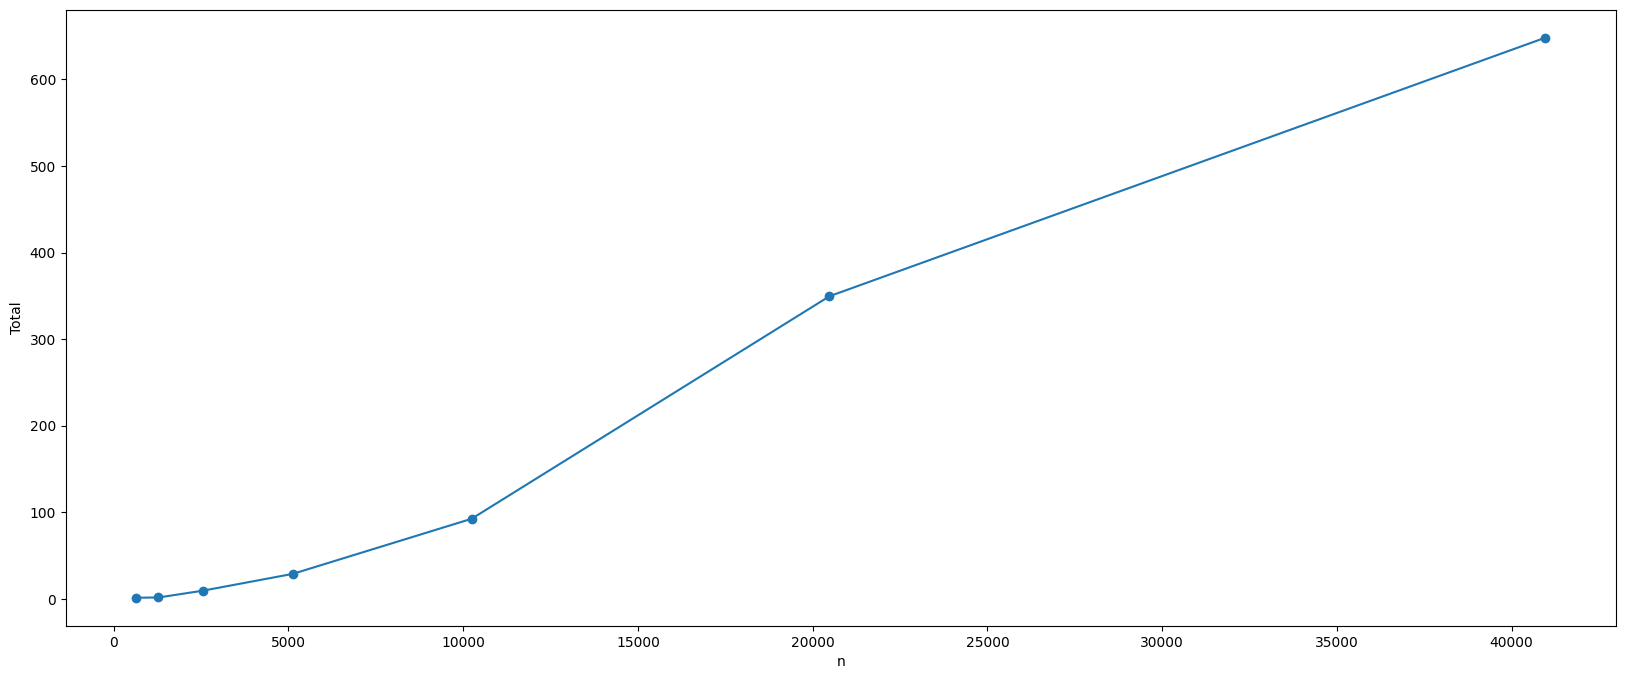

In [23]:
plot_column(dexpnode, ["Total"])

##### Show partitionsComputation

In [24]:
dexpnode[["Community computation"]]

,Community computation
n,
640,0.011232
1280,0.035937
2560,0.057544
5120,0.090647
10240,0.172034
20480,0.265604
40960,0.386909


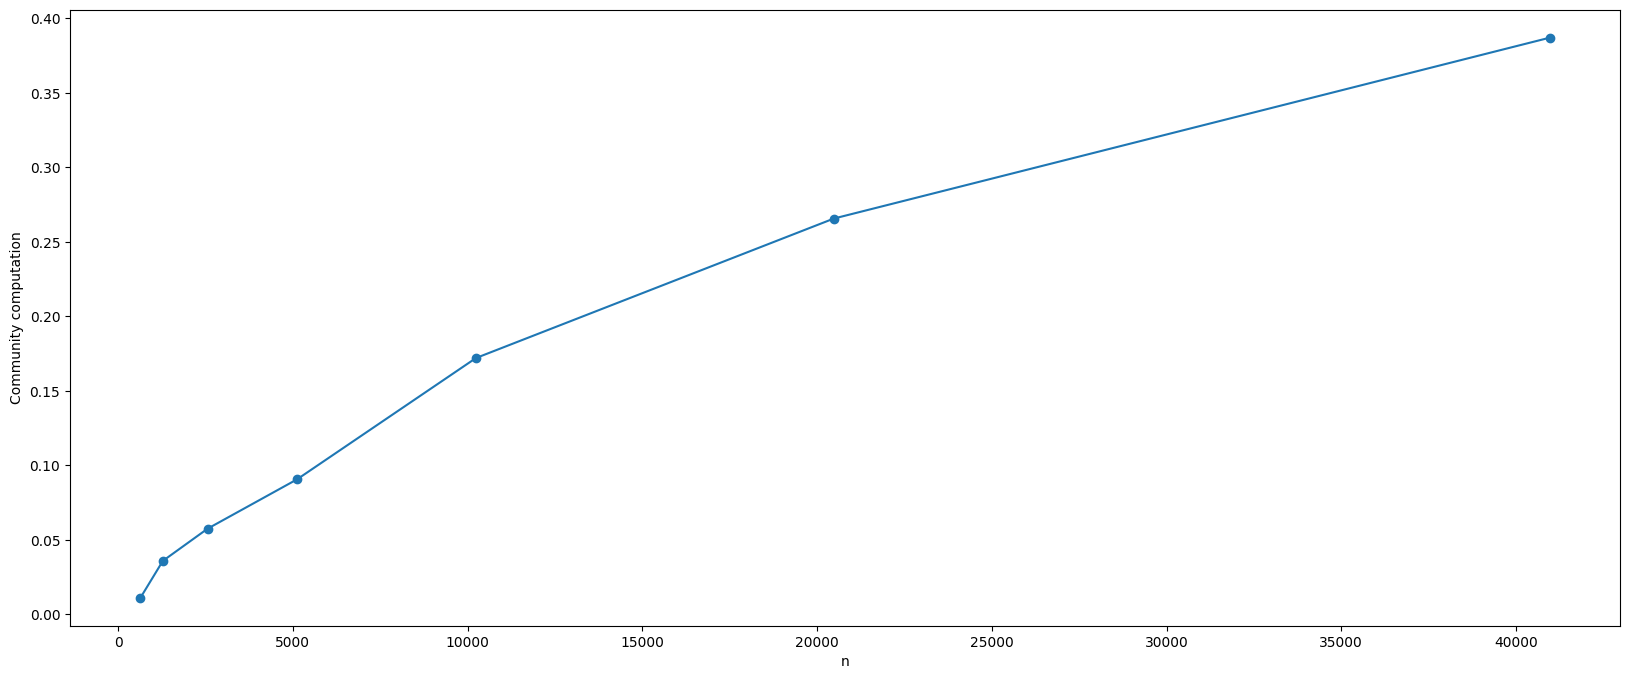

In [25]:
plot_column(dexpnode, ["Community computation"])

##### Show nodesComputation

In [26]:
dexpnode[["deltaNodesComputation"]]

,deltaNodesComputation
n,
640,0.035598
1280,0.058270
2560,0.084543
5120,0.275916
10240,0.462344
20480,1.120295
40960,3.956231


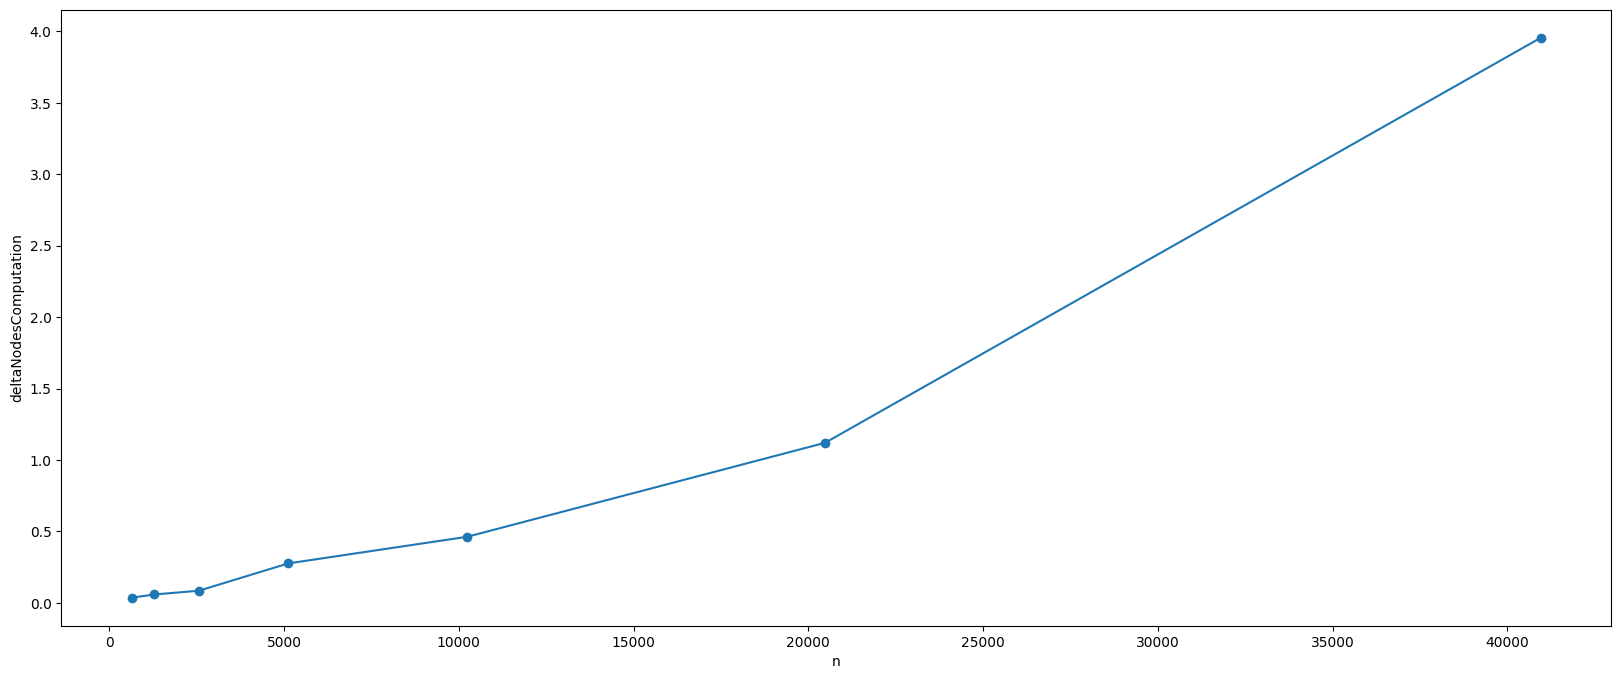

In [27]:
plot_column(dexpnode, ["deltaNodesComputation"])

##### Show deltaGLR

In [28]:
dexpnode[["deltaGLR"]]

,deltaGLR
n,
640,1.229430
1280,1.469972
2560,9.343578
5120,28.437199
10240,91.837308
20480,348.211790
40960,643.904615


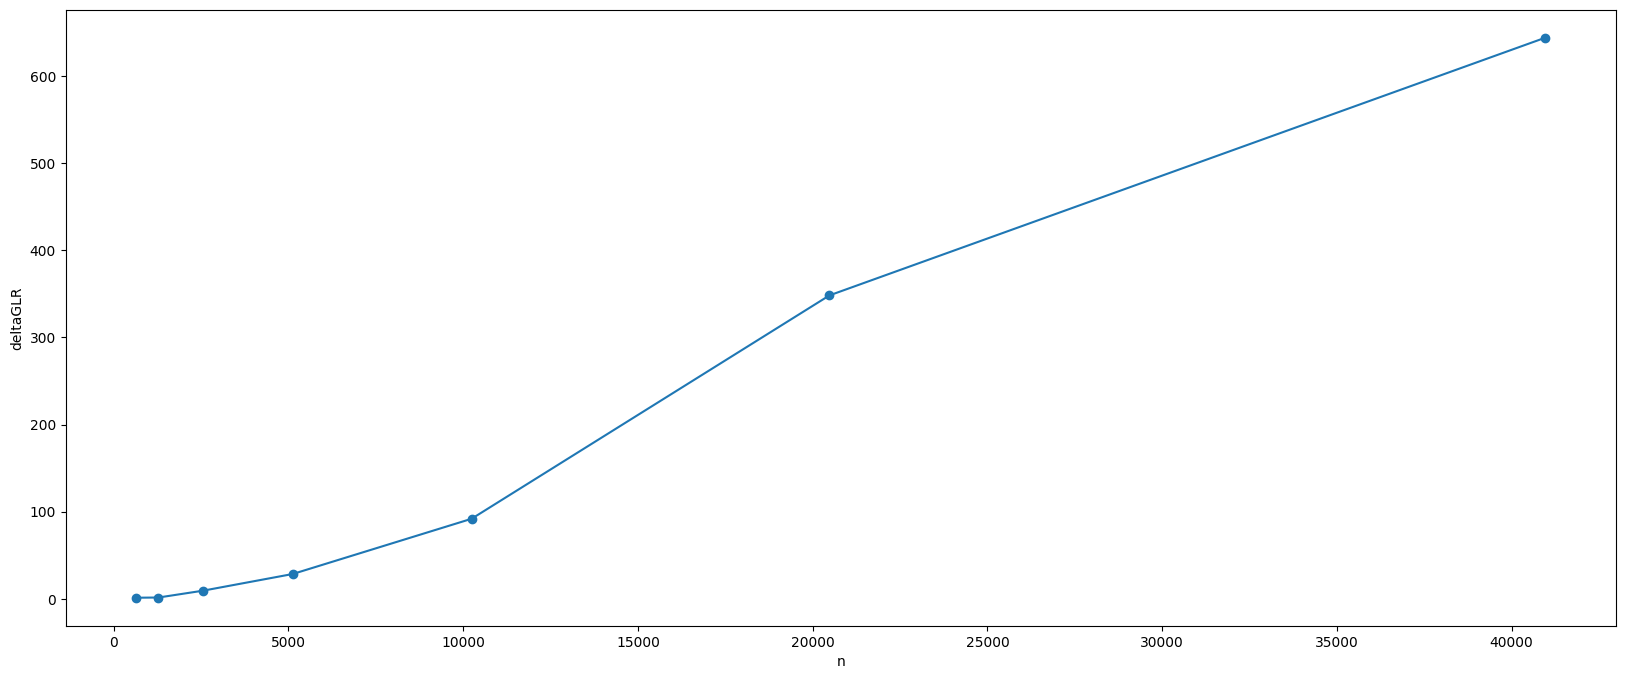

In [29]:
plot_column(dexpnode, ["deltaGLR"])

# Programming Language Comparison (EXP2)

##### Filter results

In [30]:
all_comparison = all_data[ all_data["Flag"] == "2expnode(fixnumbercommunity)"]

In [31]:
py_comparison = all_comparison[ all_comparison["Code"] == "python"]
py_comparison = py_comparison.drop(columns=["Code", "m"])
cpp_comparison = all_comparison[ all_comparison["Code"] == "C++"]
cpp_comparison = cpp_comparison.drop(columns=["Code", "m"])

comparison = pd.merge(py_comparison, cpp_comparison, how="inner", on=["n", "Graph", "Partition", "Flag"], suffixes=("_py", "_cpp"))
comparison

,Graph,Flag,Partition,n,Community computation_py,Nodes computation_py,GLR computation_py,Total_py,deltaNodesComputation_py,deltaGLR_py,Community computation_cpp,Nodes computation_cpp,GLR computation_cpp,Total_cpp,deltaNodesComputation_cpp,deltaGLR_cpp
0,"2expnode(n=10240, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,10240,0.076463,0.877427,49.523101,49.524659,0.800964,48.645674,0.012957,0.211121,67.215487,67.217266,0.198164,67.004366
1,"2expnode(n=1280, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,1280,0.006699,0.077879,1.516051,1.516336,0.071180,1.438172,0.006231,0.056307,1.462929,1.463108,0.050076,1.406622
2,"2expnode(n=20480, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,20480,0.033712,2.165051,153.668088,153.671923,2.131339,151.503037,0.034867,0.350966,209.491742,209.495447,0.316099,209.140776
3,"2expnode(n=2560, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,2560,0.007239,0.393742,7.859056,7.859581,0.386503,7.465314,0.020061,0.110855,8.541427,8.541848,0.090794,8.430572
4,"2expnode(n=40960, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,40960,0.071342,7.968201,553.460172,553.484491,7.896858,545.491971,0.034551,3.266895,675.808144,675.816235,3.232344,672.541249
5,"2expnode(n=5120, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,5120,0.056638,0.656639,16.195146,16.195926,0.600000,15.538508,0.010687,0.122292,18.889932,18.890725,0.111605,18.767640
6,"2expnode(n=640, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,640,0.013811,0.076439,1.056673,1.056838,0.062629,0.980234,0.004539,0.020019,1.040790,1.040871,0.015480,1.020771


##### Set number of nodes as ID

In [32]:
comparison.set_index("n", inplace=True)
comparison.sort_index(inplace=True)

##### Compare total time

In [33]:
comparison.filter(regex='Total')

,Total_py,Total_cpp
n,,
640,1.056838,1.040871
1280,1.516336,1.463108
2560,7.859581,8.541848
5120,16.195926,18.890725
10240,49.524659,67.217266
20480,153.671923,209.495447
40960,553.484491,675.816235


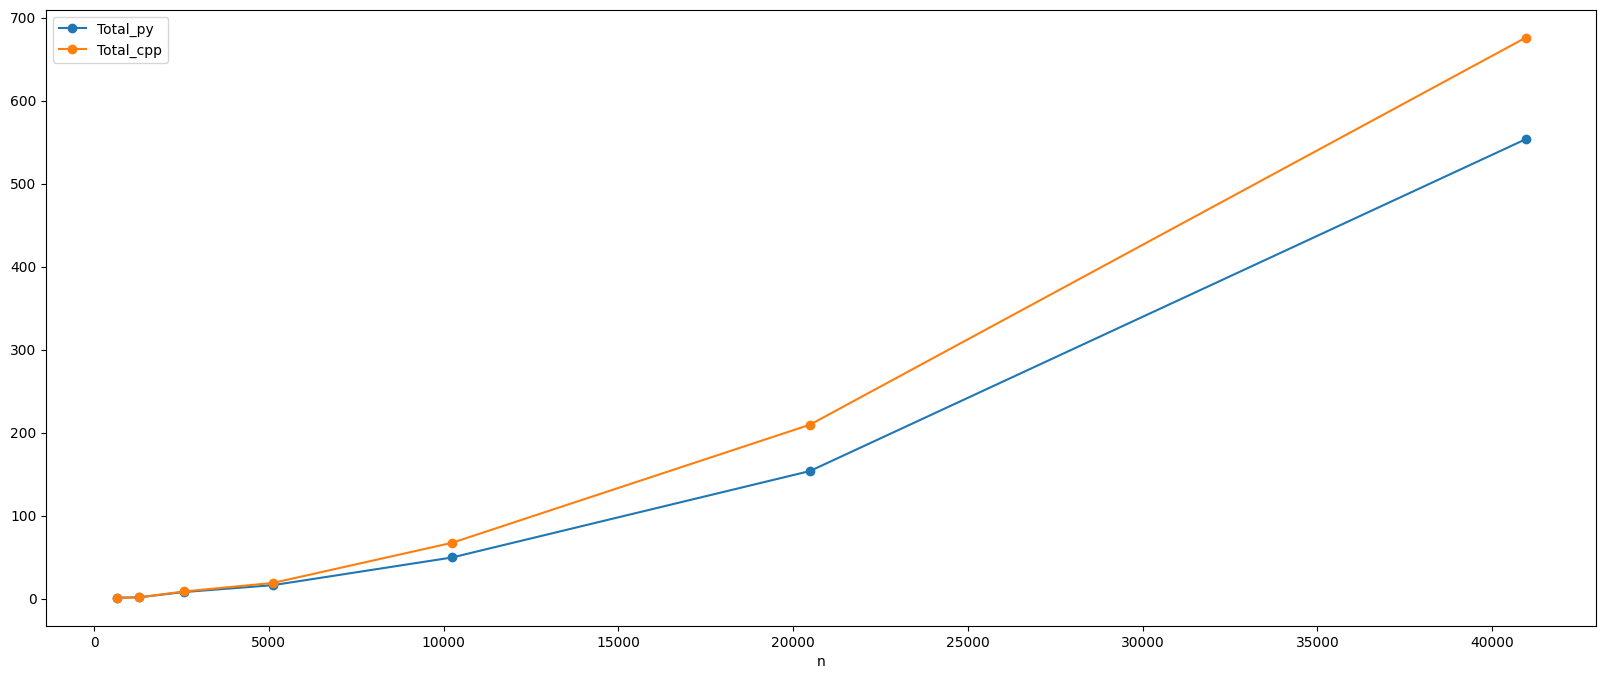

In [34]:
plot_column(comparison, ['Total_py', 'Total_cpp'], one_ax=True)

##### Compare nodesComputation

In [35]:
comparison.filter(regex="deltaNodesComputation")

,deltaNodesComputation_py,deltaNodesComputation_cpp
n,,
640,0.062629,0.015480
1280,0.071180,0.050076
2560,0.386503,0.090794
5120,0.600000,0.111605
10240,0.800964,0.198164
20480,2.131339,0.316099
40960,7.896858,3.232344


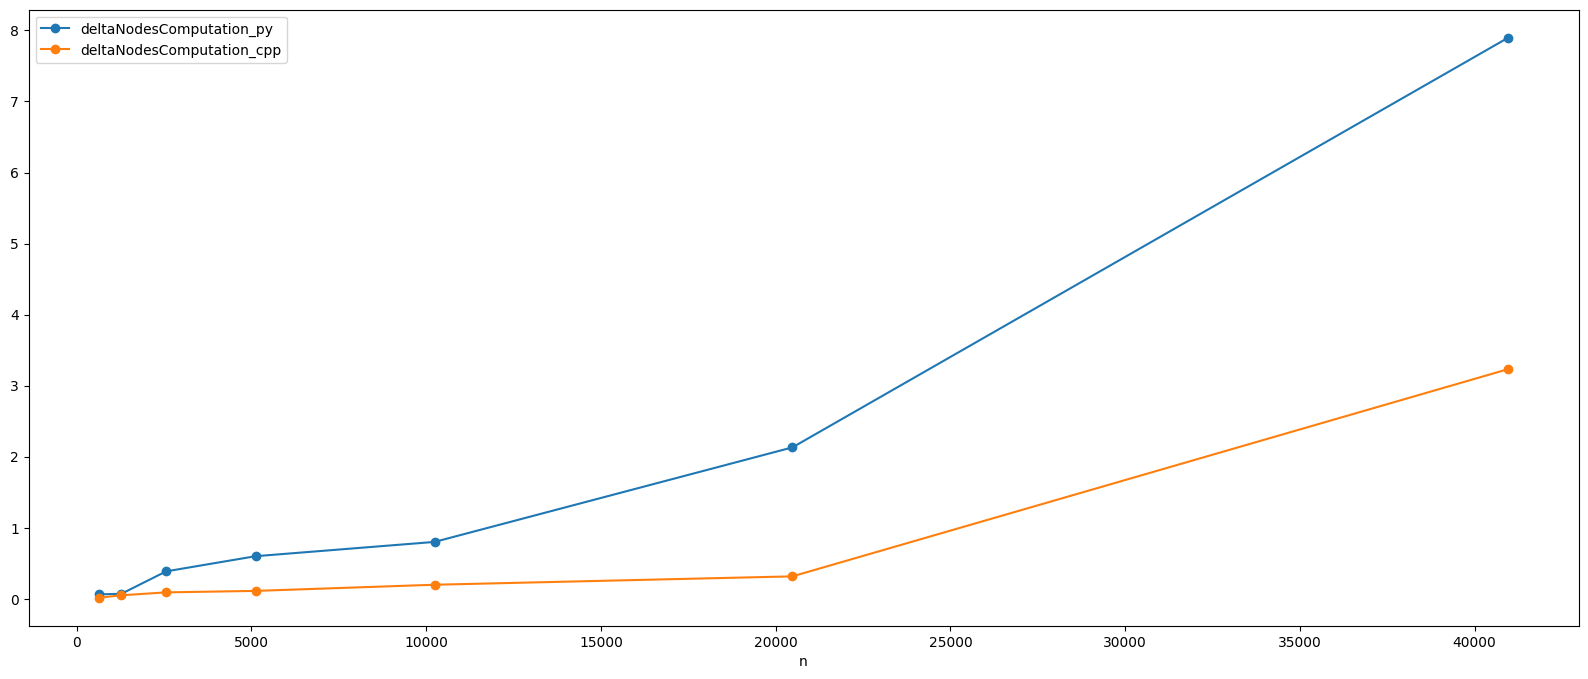

In [36]:
plot_column(comparison, ['deltaNodesComputation_py', 'deltaNodesComputation_cpp'], one_ax=True)

##### Compare deltaGLR

In [37]:
comparison.filter(regex="deltaGLR")

,deltaGLR_py,deltaGLR_cpp
n,,
640,0.980234,1.020771
1280,1.438172,1.406622
2560,7.465314,8.430572
5120,15.538508,18.767640
10240,48.645674,67.004366
20480,151.503037,209.140776
40960,545.491971,672.541249


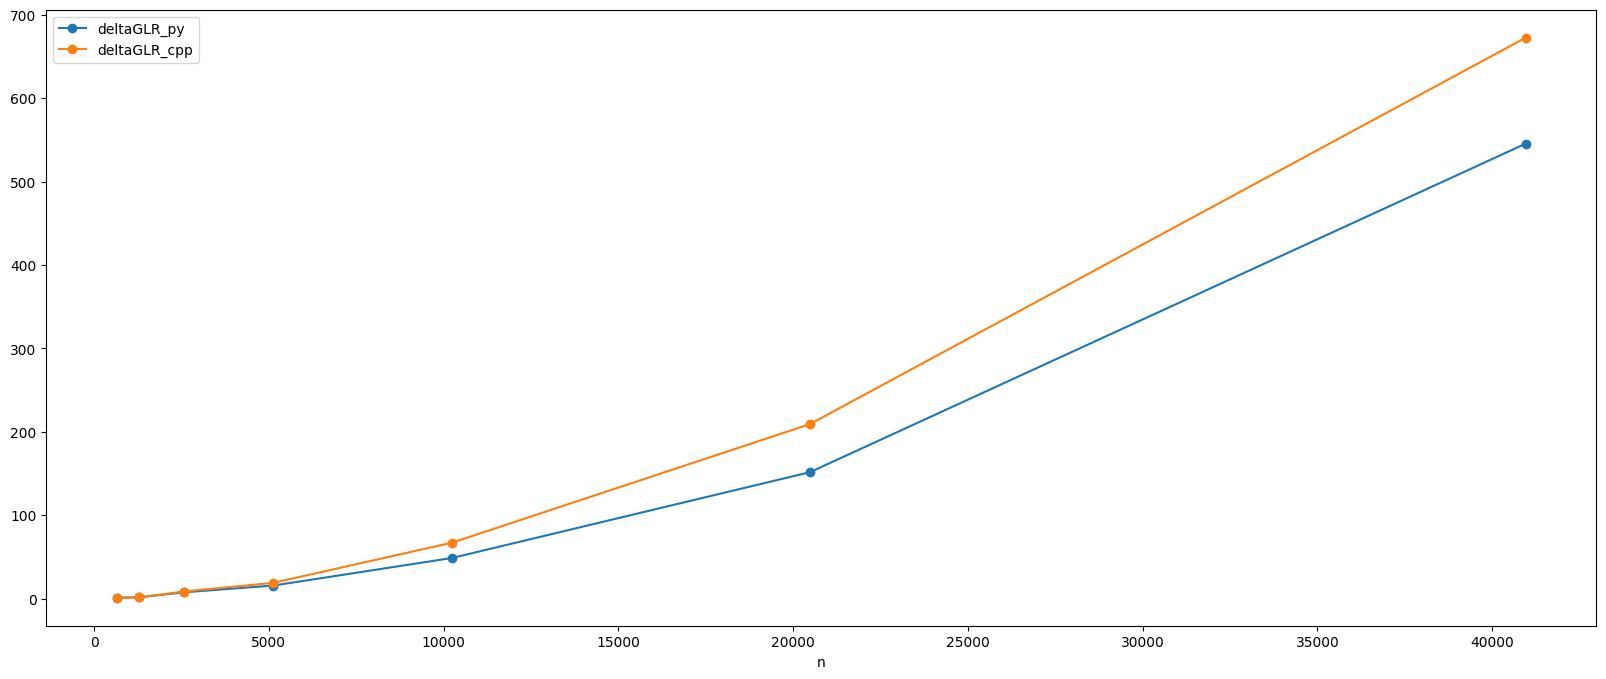

In [38]:
plot_column(comparison, ['deltaGLR_py', 'deltaGLR_cpp'], one_ax=True)

# Double Experiment (EXP2)

##### Filter results

In [39]:
dexpnode_ten = all_data[ all_data["Flag"] == "2expnode(fixnumbercommunity)"]
dexpnode_ten = dexpnode_ten[dexpnode_ten["Code"] == programming_language]

##### Set number of nodes as ID

In [40]:
dexpnode_ten.set_index("n", inplace=True)
dexpnode_ten.sort_index(inplace=True)

##### Show total time

In [41]:
dexpnode_ten[["Total"]]

,Total
n,
640,1.040871
1280,1.463108
2560,8.541848
5120,18.890725
10240,67.217266
20480,209.495447
40960,675.816235


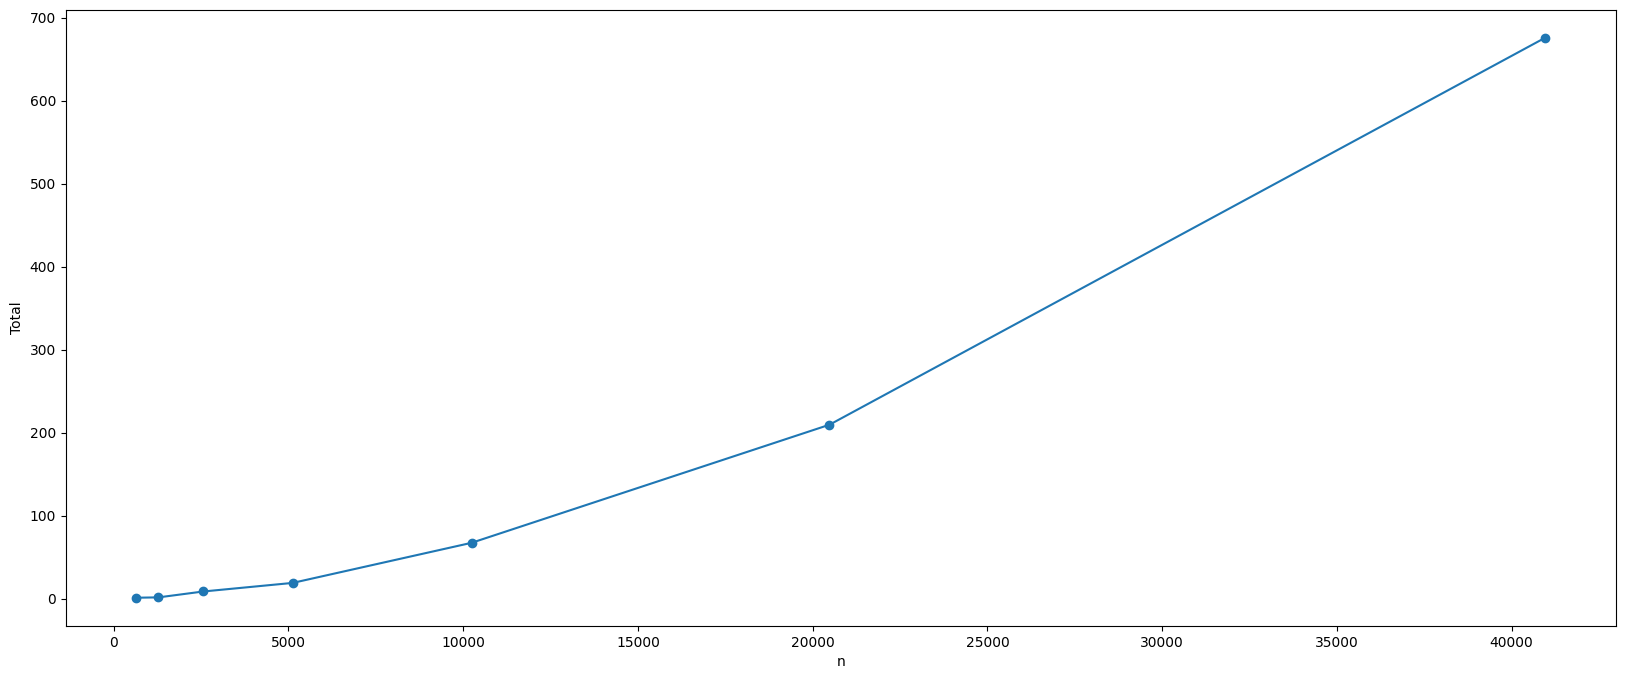

In [42]:
plot_column(dexpnode_ten, ["Total"])

##### Show nodesComputation

In [43]:
dexpnode_ten[["deltaNodesComputation"]]

,deltaNodesComputation
n,
640,0.015480
1280,0.050076
2560,0.090794
5120,0.111605
10240,0.198164
20480,0.316099
40960,3.232344


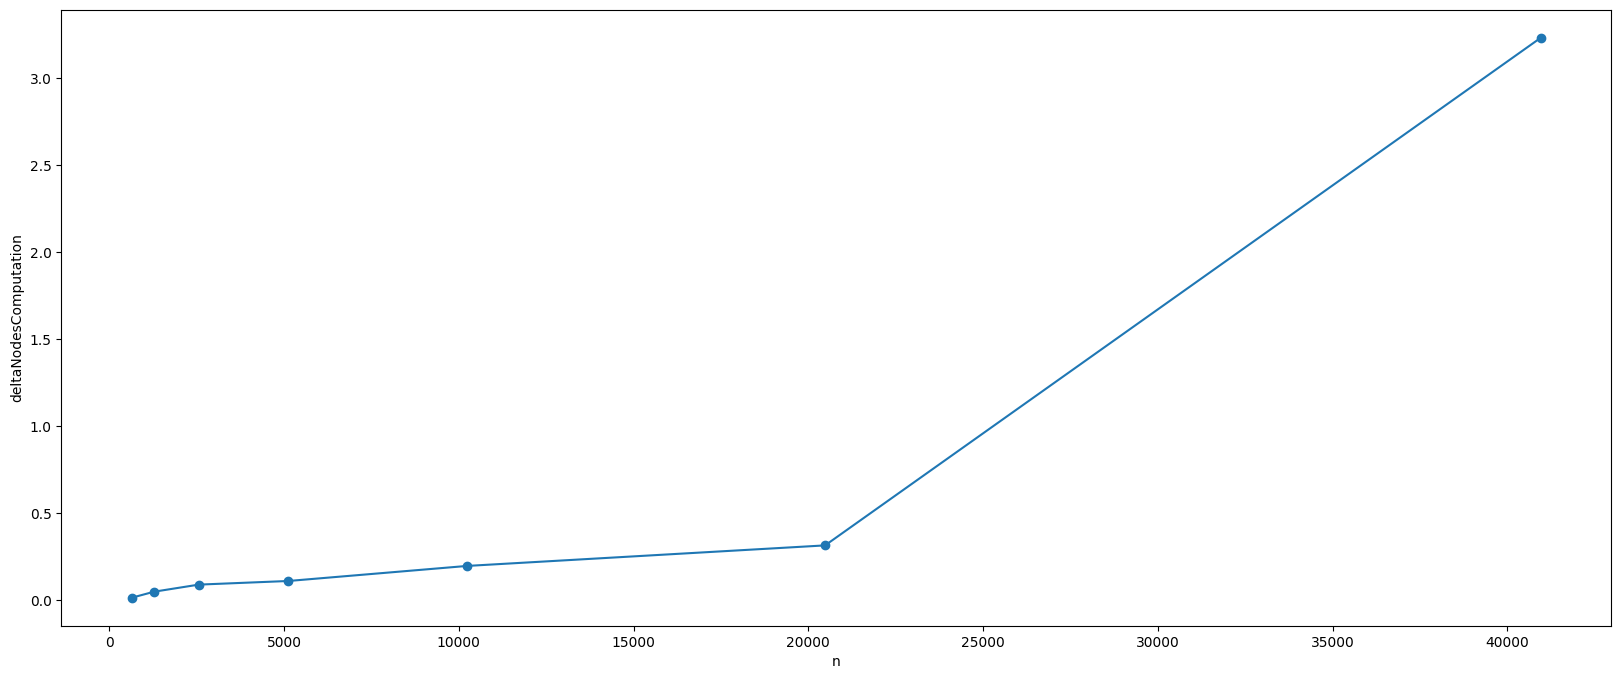

In [44]:
plot_column(dexpnode_ten, ["deltaNodesComputation"])

##### Show deltaGLR

In [45]:
dexpnode_ten[["deltaGLR"]]

,deltaGLR
n,
640,1.020771
1280,1.406622
2560,8.430572
5120,18.767640
10240,67.004366
20480,209.140776
40960,672.541249


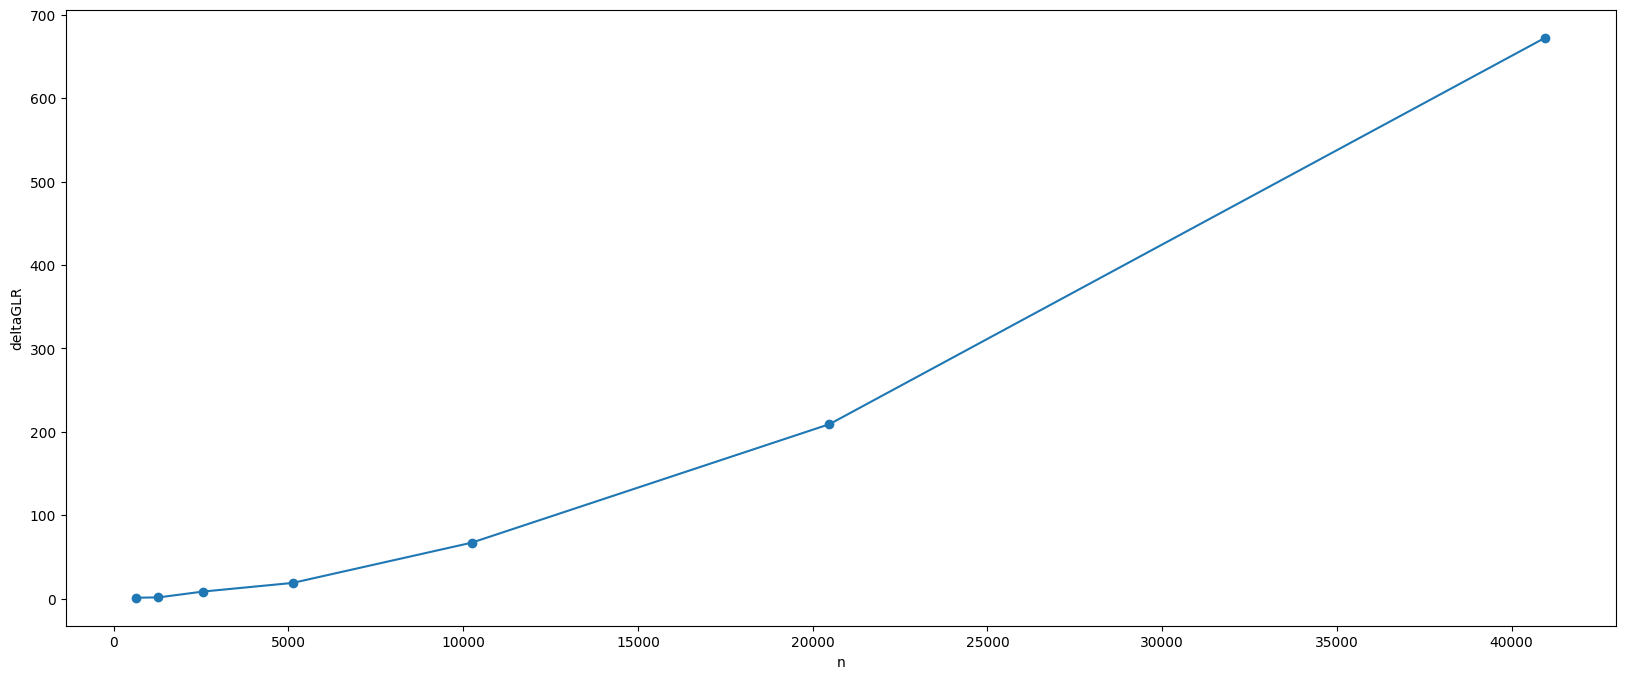

In [46]:
plot_column(dexpnode_ten, ["deltaGLR"])

# Double Experiment (EXP3)

##### Filter results

In [47]:
dexpcommunity = all_data[ all_data["Flag"] == "2expcommunity"]
dexpcommunity = dexpcommunity[dexpcommunity["Code"] == programming_language]

##### Set number of community as ID

In [48]:
def get_number_community(partition_name):
    partition_name = partition_name.split("/")[-1]
    partition_id = partition_name[len("partition"):]
    return int(partition_id)

dexpcommunity["#community"] = dexpcommunity['Partition'].apply(get_number_community)
dexpcommunity.set_index("#community", inplace=True)
dexpcommunity.sort_index(inplace=True)

##### Show total time

In [49]:
dexpcommunity[["Total"]]

,Total
#community,
2,333.369346
4,354.963558
8,396.794755
16,410.086808
32,467.145063
64,516.819374
128,468.918016


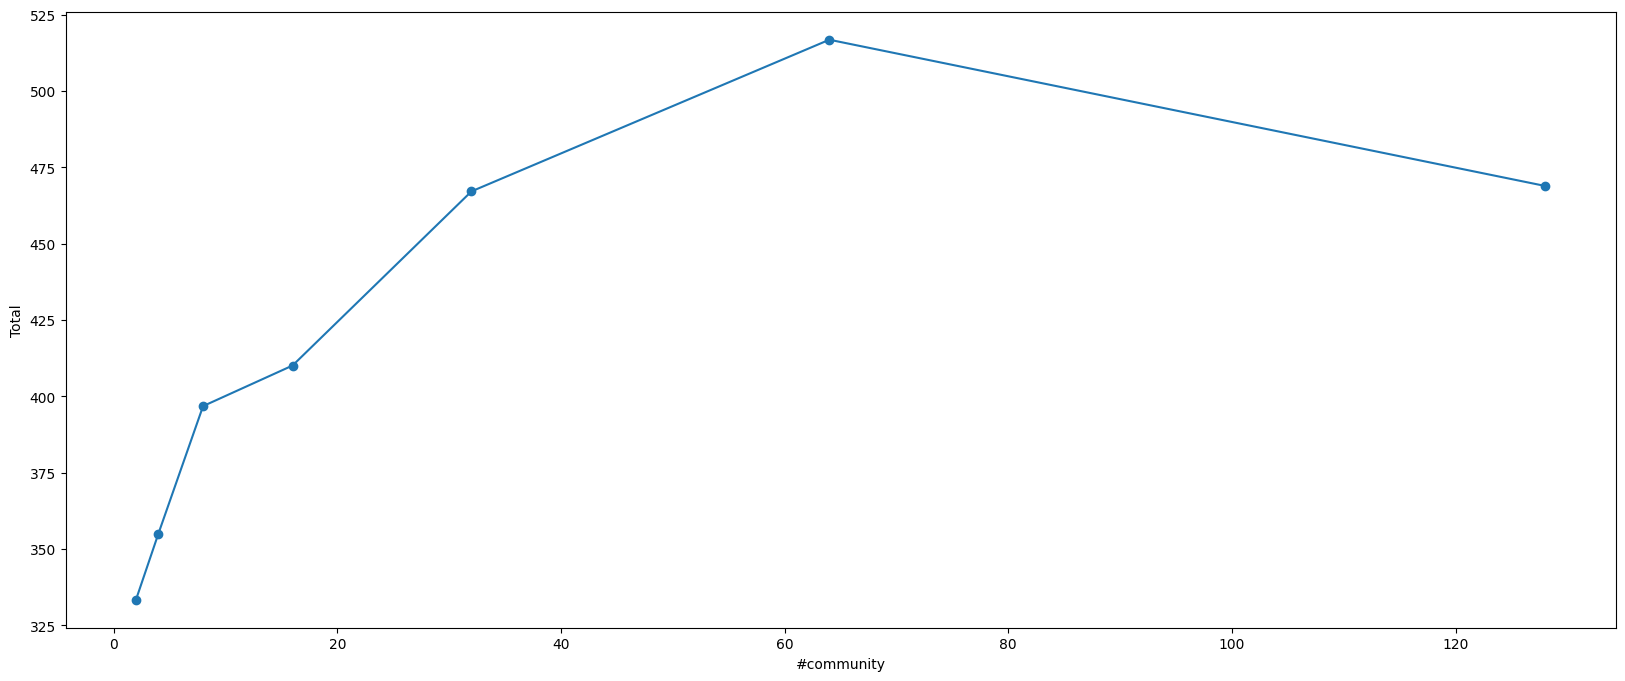

In [50]:
plot_column(dexpcommunity, ["Total"])

##### Show nodesComputation

In [51]:
dexpcommunity[["deltaNodesComputation"]]

,deltaNodesComputation
#community,
2,5.775984
4,1.913278
8,0.790779
16,1.288723
32,1.443407
64,2.016500
128,2.641704


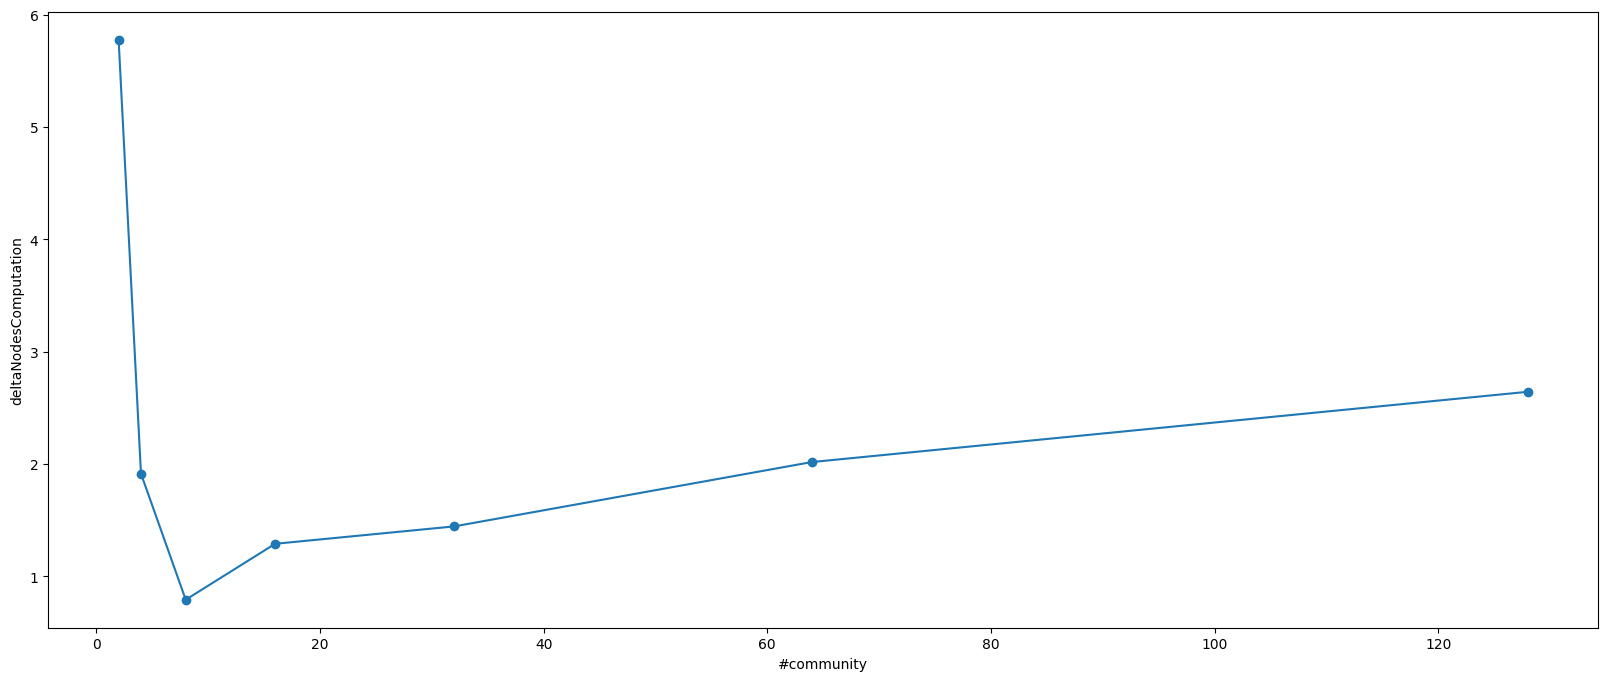

In [52]:
plot_column(dexpcommunity, ["deltaNodesComputation"])

##### Show deltaGLR

In [53]:
dexpcommunity[["deltaGLR"]]

,deltaGLR
#community,
2,327.455927
4,353.009847
8,395.876167
16,408.632015
32,465.494999
64,514.342299
128,465.914077


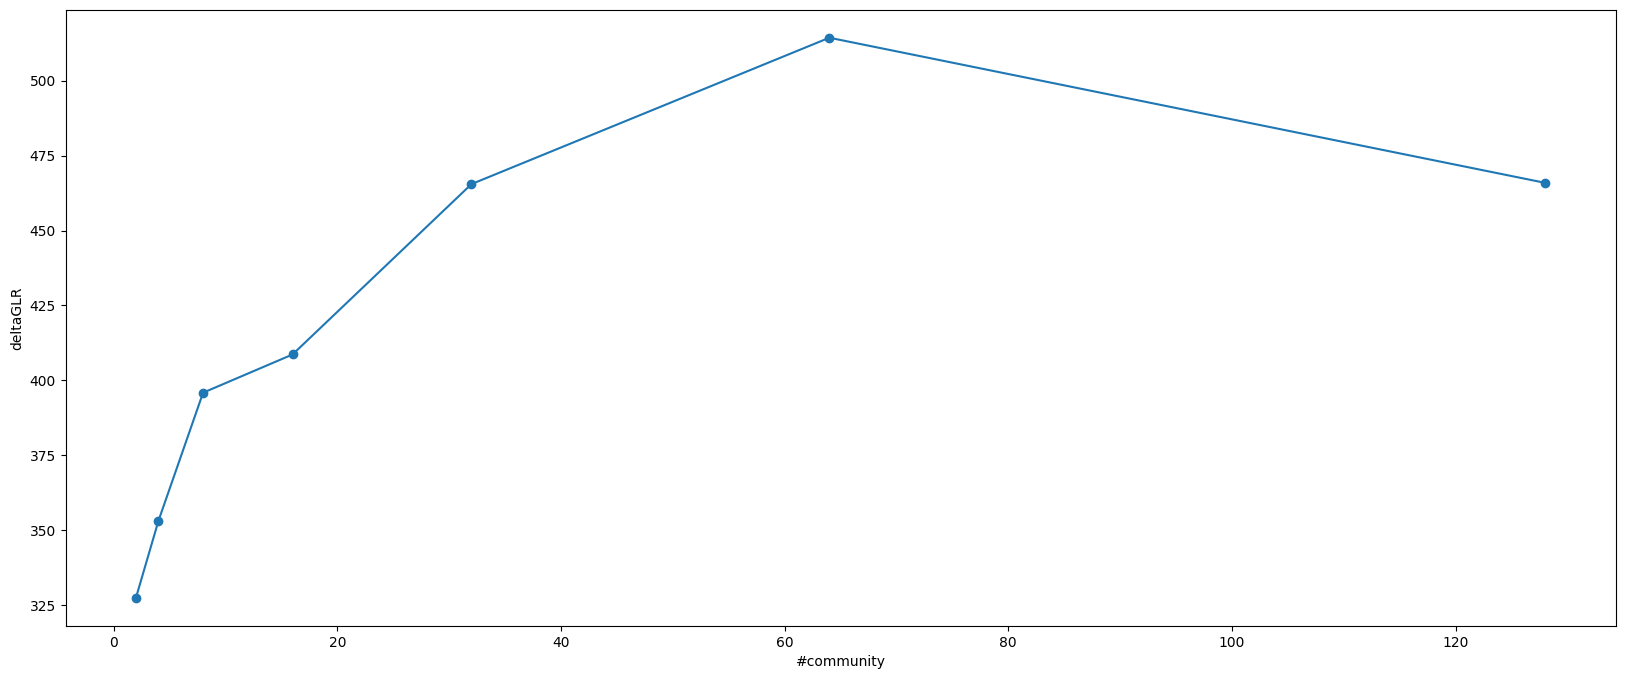

In [54]:
plot_column(dexpcommunity, ["deltaGLR"])

# Double Experiment (EXP4)

##### Filter results

In [55]:
dexpedge = all_data[ all_data["Flag"] == "2expedge"]
dexpedge = dexpedge[dexpedge["Code"] == programming_language]

##### Set number of edges as ID

In [56]:
dexpedge.set_index("m", inplace=True)
dexpedge.sort_index(inplace=True)

##### Show total time

In [57]:
dexpedge[["Total"]]

,Total
m,
639,0.292030
1278,0.237335
2556,0.453809
5112,0.430859
10224,1.118243
20448,0.717383
40896,1.321493
81792,3.548007
163584,5.495569


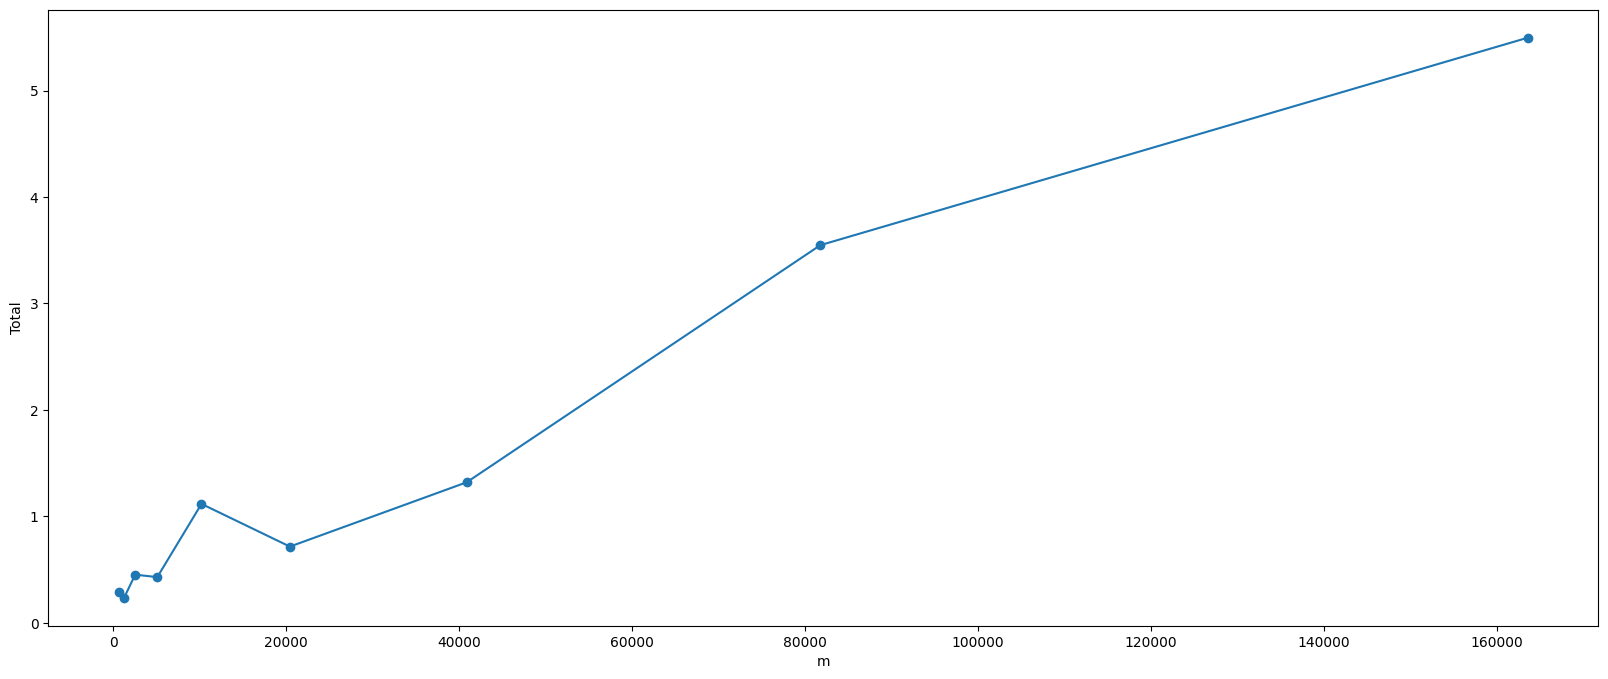

In [58]:
plot_column(dexpedge, ["Total"])

##### Show partitionsComputation

In [59]:
dexpedge[["Community computation"]]

,Community computation
m,
639,0.134443
1278,0.006216
2556,0.012383
5112,0.026923
10224,0.436834
20448,0.116382
40896,0.021626
81792,0.091859
163584,0.040110


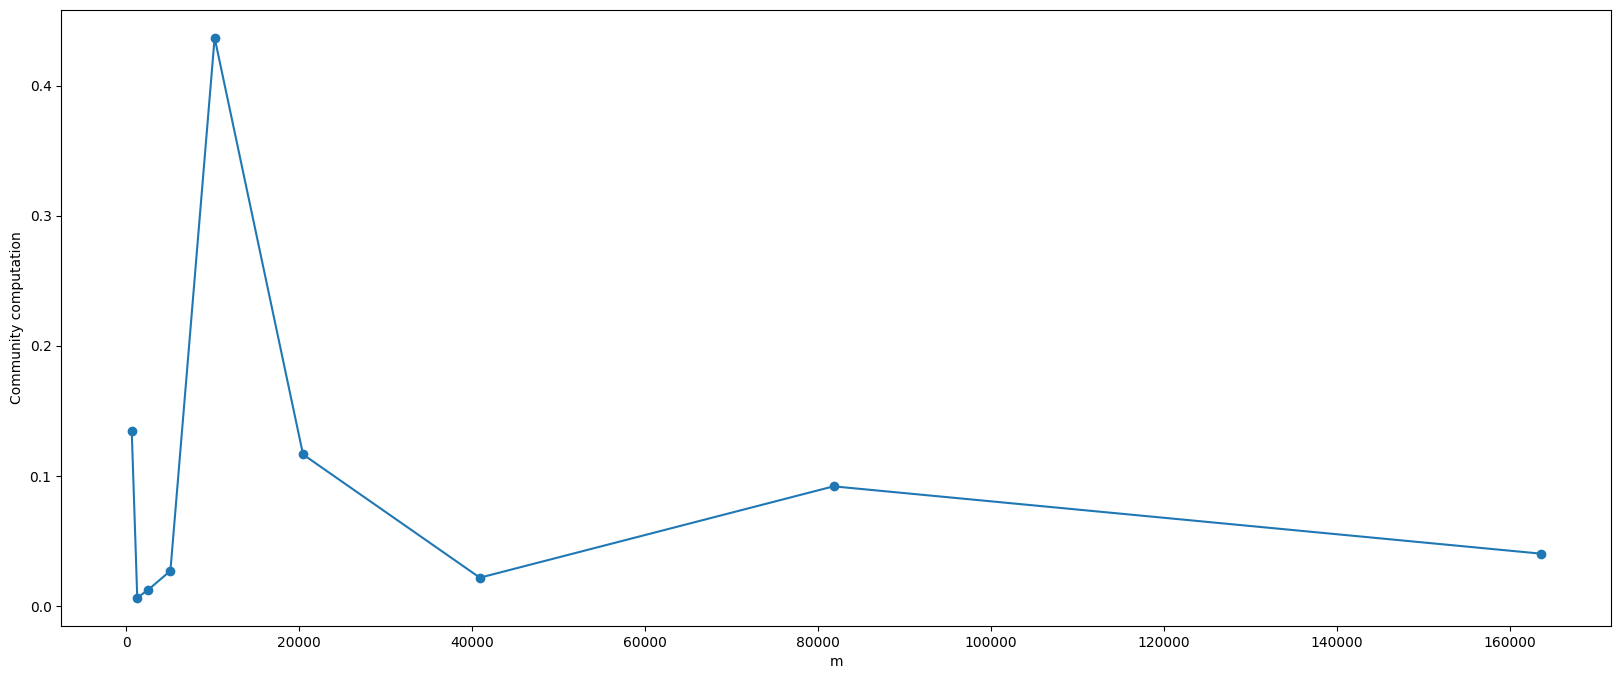

In [60]:
plot_column(dexpedge, ["Community computation"])

##### Show nodesComputation

In [61]:
dexpedge[["deltaNodesComputation"]]

,deltaNodesComputation
m,
639,0.005511
1278,0.016324
2556,0.090676
5112,0.009120
10224,0.016200
20448,0.009914
40896,0.051937
81792,0.037855
163584,0.046259


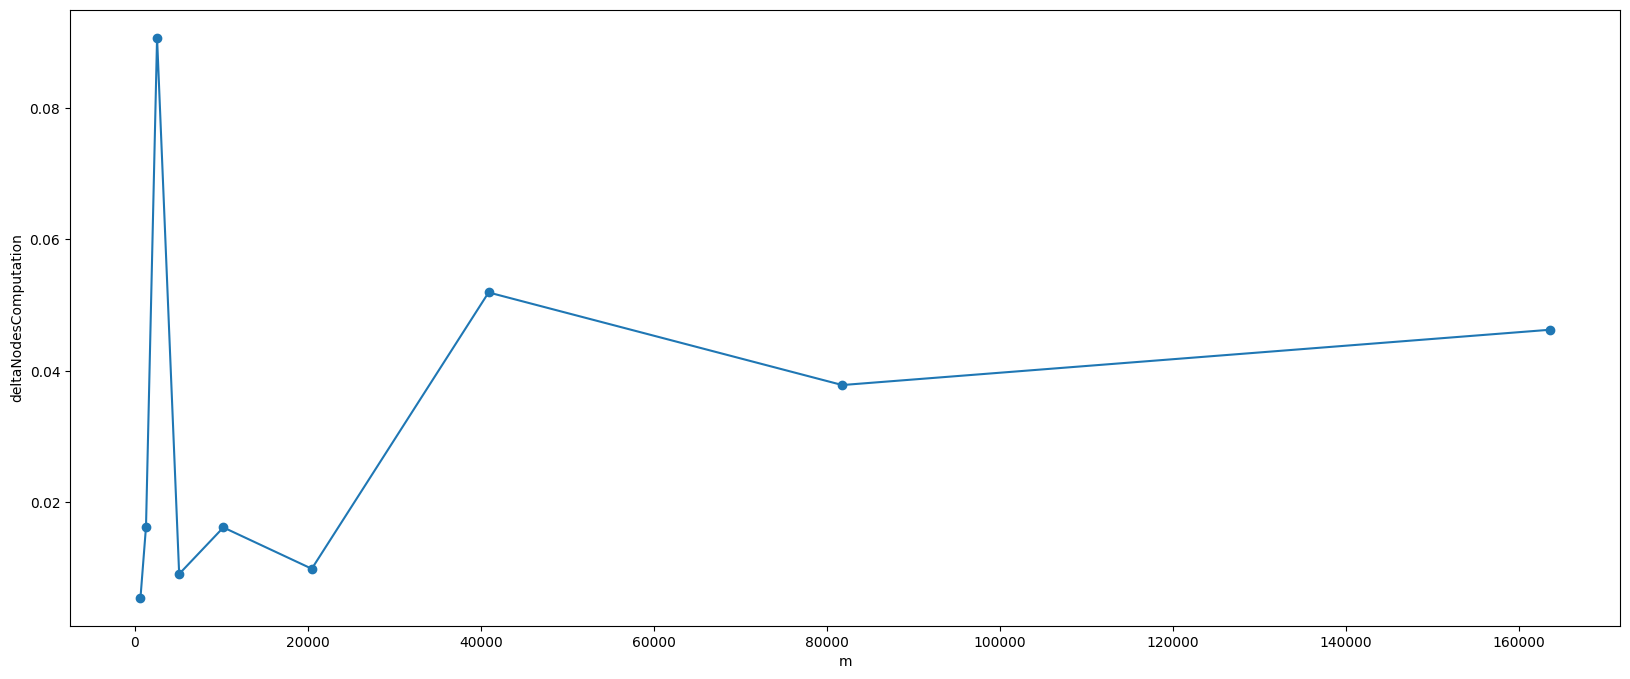

In [62]:
plot_column(dexpedge, ["deltaNodesComputation"])

##### Show deltaGLR

In [63]:
dexpedge[["deltaGLR"]]

,deltaGLR
m,
639,0.151887
1278,0.214641
2556,0.350607
5112,0.394678
10224,0.665073
20448,0.590957
40896,1.247796
81792,3.418155
163584,5.409024


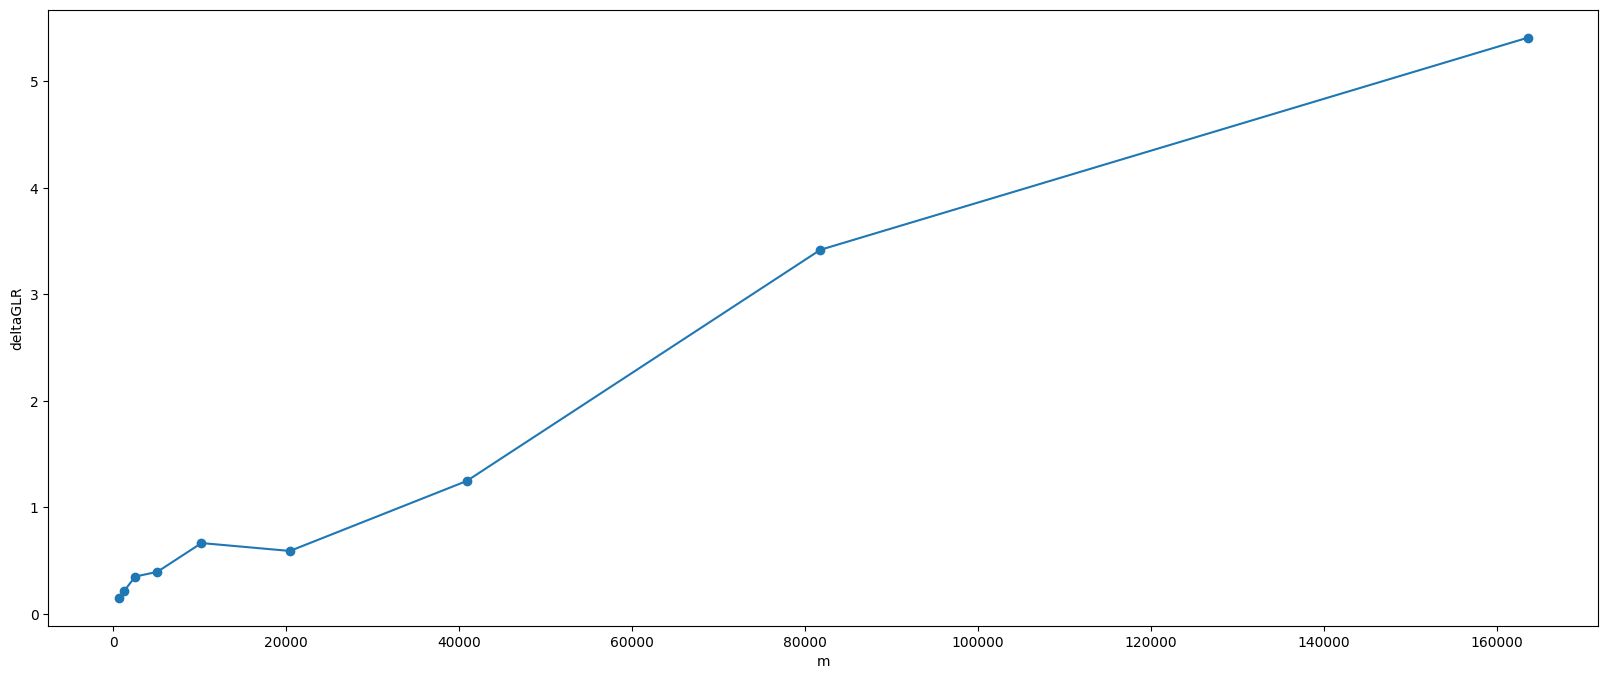

In [64]:
plot_column(dexpedge, ["deltaGLR"])

# Double Experiment (EXP5)

##### Filter results

In [65]:
dexpnodeundirected = all_data[ all_data["Flag"] == "2expnodeundirected(fixpartition)"]
dexpnodeundirected = dexpnodeundirected[dexpnodeundirected["Code"] == programming_language]

##### Set number of node as ID

In [66]:
dexpnodeundirected.set_index("n", inplace=True)
dexpnodeundirected.sort_index(inplace=True)

##### Show total time

In [67]:
dexpnodeundirected[["Total"]]

,Total
n,
640,0.037715
1280,0.054657
2560,0.132585
5120,0.176896
10240,0.244762
20480,0.523230
40960,1.873114


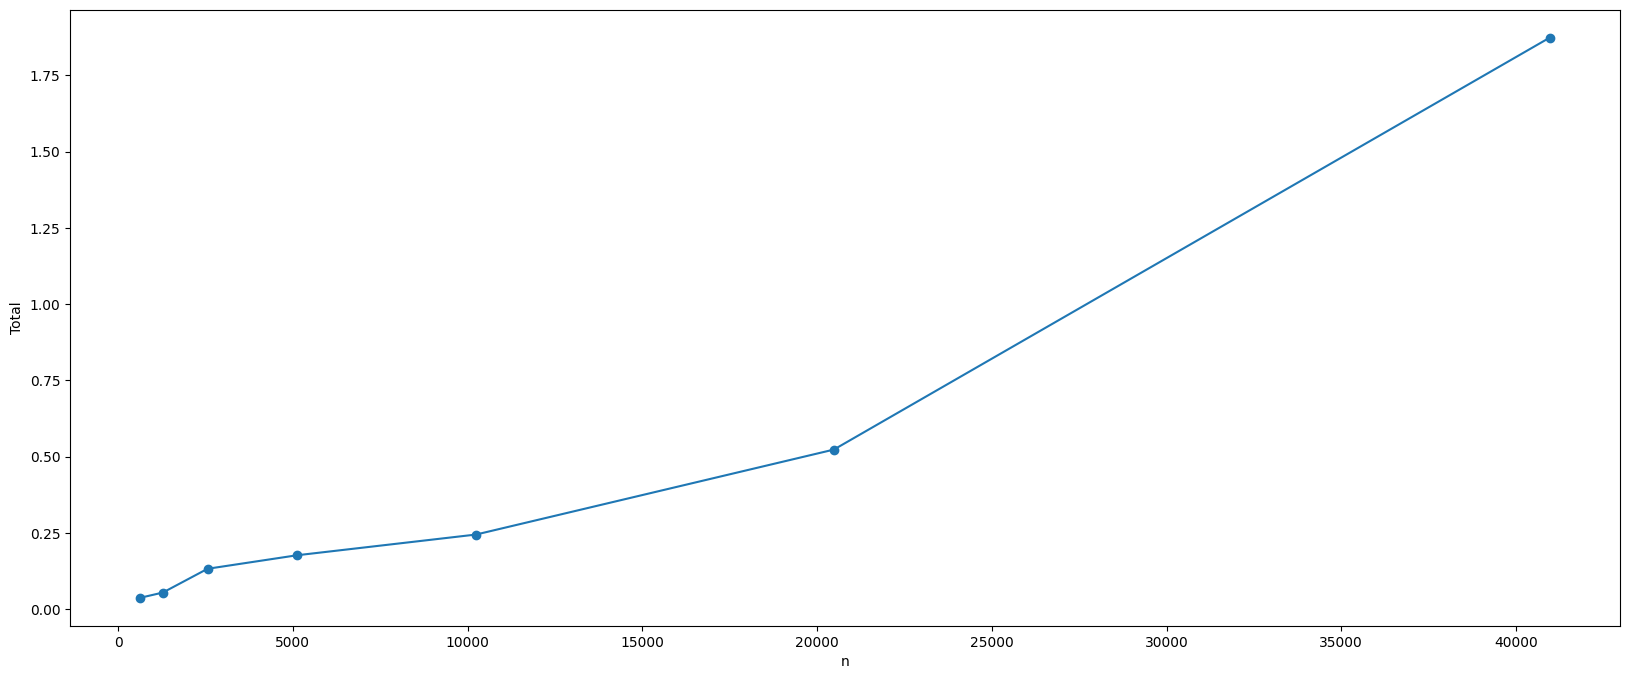

In [68]:
plot_column(dexpnodeundirected, ["Total"])

##### Show nodesComputation

In [69]:
dexpnodeundirected[["deltaNodesComputation"]]

,deltaNodesComputation
n,
640,0.018567
1280,0.038500
2560,0.116735
5120,0.156818
10240,0.212967
20480,0.471955
40960,1.808781


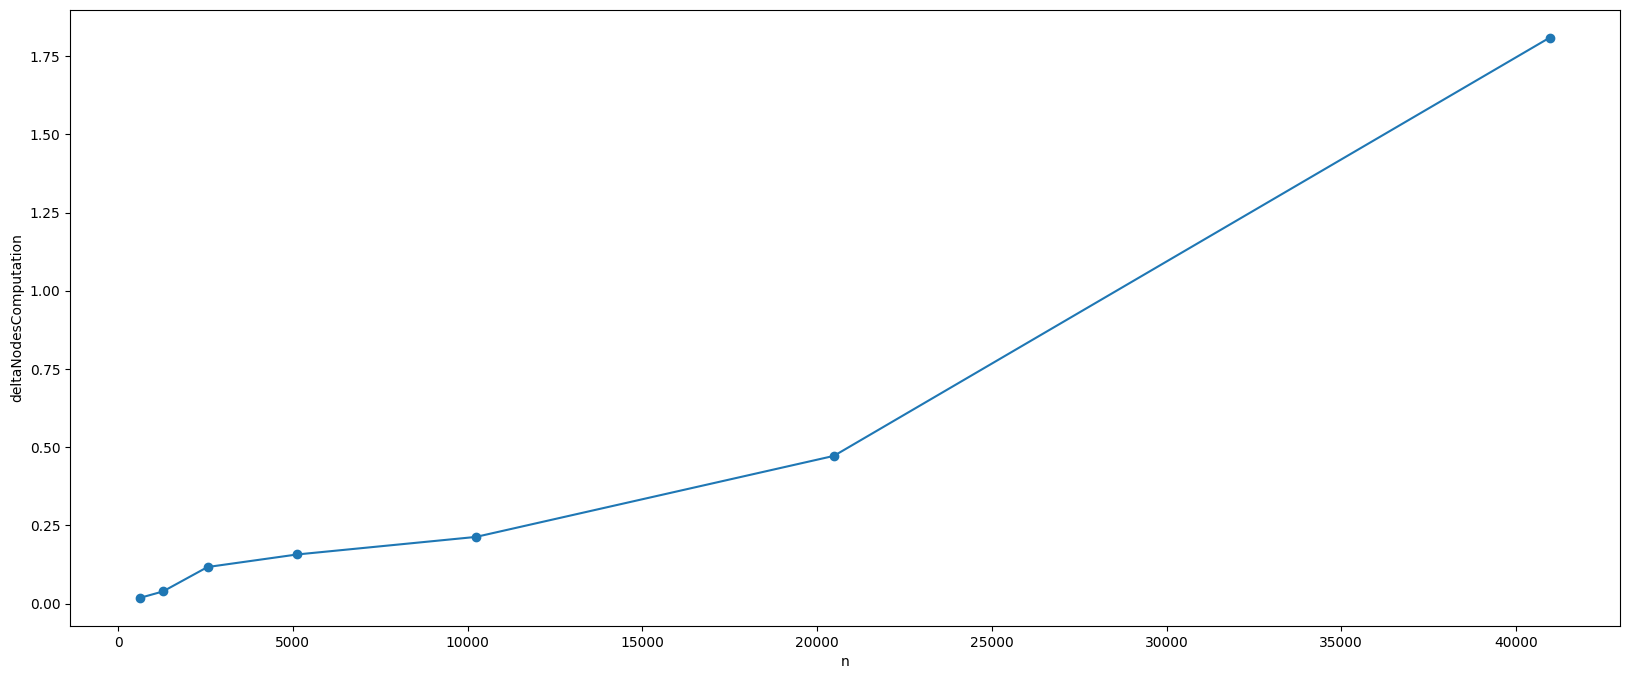

In [70]:
plot_column(dexpnodeundirected, ["deltaNodesComputation"])

##### Show deltaGLR

In [71]:
dexpnodeundirected[["deltaGLR"]]

,deltaGLR
n,
640,0.000942
1280,0.001084
2560,0.001642
5120,0.002821
10240,0.004886
20480,0.012257
40960,0.018703


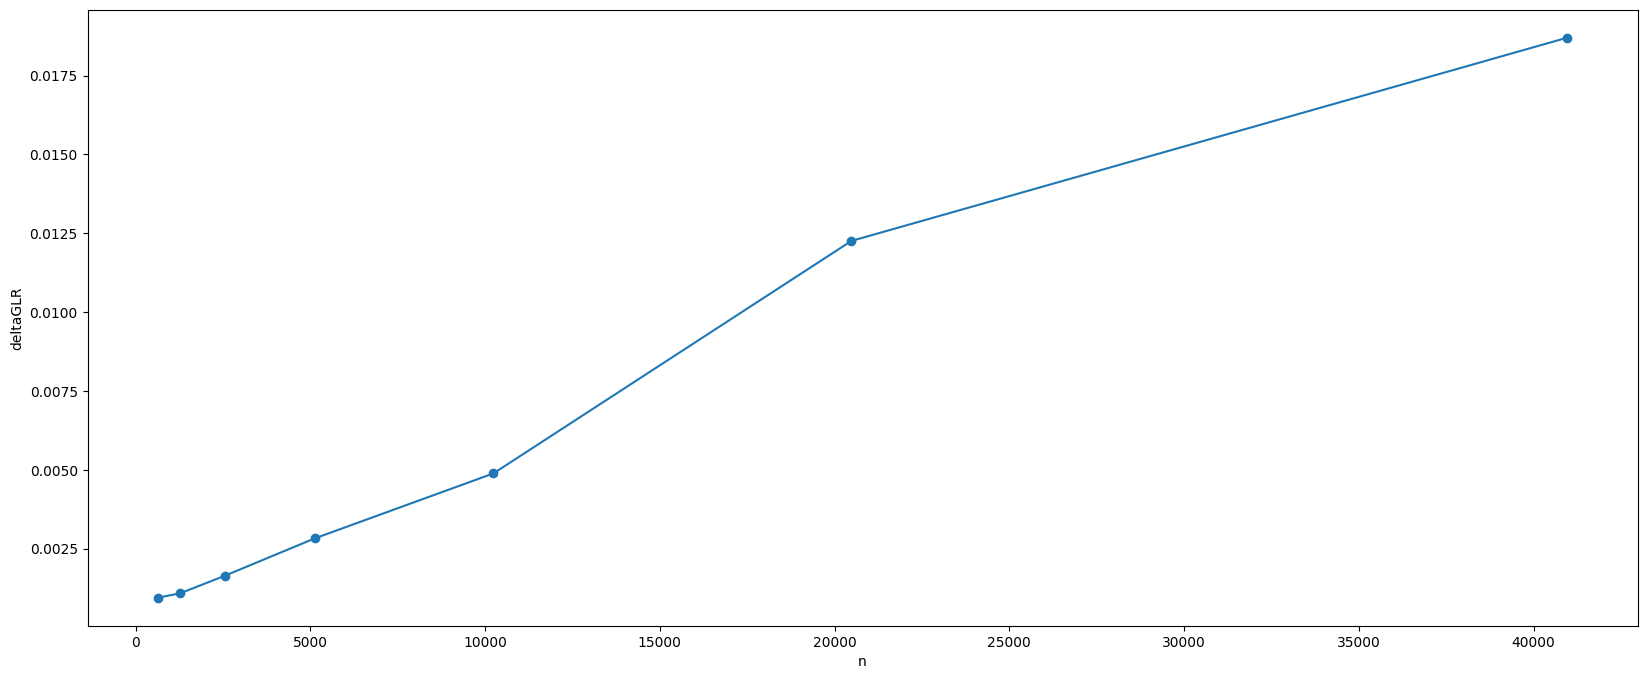

In [72]:
plot_column(dexpnodeundirected, ["deltaGLR"])

# Programming Language Comparison (EXP5)

##### Filter results

In [73]:
all_comparison = all_data[all_data["Flag"] == "2expnodeundirected(fixpartition)"]

In [74]:
py_comparison = all_comparison[all_comparison["Code"] == "python"]
py_comparison = py_comparison.drop(columns=["Code", "m"])
cpp_comparison = all_comparison[all_comparison["Code"] == "C++"]
cpp_comparison = cpp_comparison.drop(columns=["Code", "m"])

comparison = pd.merge(py_comparison, cpp_comparison, how="inner", on=["n", "Graph", "Partition", "Flag"],
                      suffixes=("_py", "_cpp"))
comparison

,Graph,Flag,Partition,n,Community computation_py,Nodes computation_py,GLR computation_py,Total_py,deltaNodesComputation_py,deltaGLR_py,Community computation_cpp,Nodes computation_cpp,GLR computation_cpp,Total_cpp,deltaNodesComputation_cpp,deltaGLR_cpp
0,"2expnode(n=10240, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,10240,0.042942,0.903955,0.981321,0.983712,0.861013,0.077366,0.026603,0.239570,0.244456,0.244762,0.212967,0.004886
1,"2expnode(n=1280, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,1280,0.012719,0.148440,0.169917,0.177190,0.135721,0.021476,0.015048,0.053548,0.054631,0.054657,0.038500,0.001084
2,"2expnode(n=20480, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,20480,0.058068,2.100210,2.229685,2.232958,2.042142,0.129475,0.038250,0.510205,0.522462,0.523230,0.471955,0.012257
3,"2expnode(n=2560, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,2560,0.024871,0.475950,0.500453,0.501007,0.451079,0.024503,0.014145,0.130879,0.132522,0.132585,0.116735,0.001642
4,"2expnode(n=40960, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,40960,0.077710,7.342861,7.596544,7.604349,7.265151,0.253683,0.043430,1.852212,1.870915,1.873114,1.808781,0.018703
5,"2expnode(n=5120, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,5120,0.022857,0.692653,0.748375,0.750087,0.669797,0.055722,0.017062,0.173880,0.176702,0.176896,0.156818,0.002821
6,"2expnode(n=640, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,640,0.010132,0.062938,0.089762,0.089964,0.052806,0.026825,0.018188,0.036755,0.037697,0.037715,0.018567,0.000942


##### Set number of nodes as ID

In [75]:
comparison.set_index("n", inplace=True)
comparison.sort_index(inplace=True)

##### Compare total time

In [76]:
comparison.filter(regex='Total')

,Total_py,Total_cpp
n,,
640,0.089964,0.037715
1280,0.177190,0.054657
2560,0.501007,0.132585
5120,0.750087,0.176896
10240,0.983712,0.244762
20480,2.232958,0.523230
40960,7.604349,1.873114


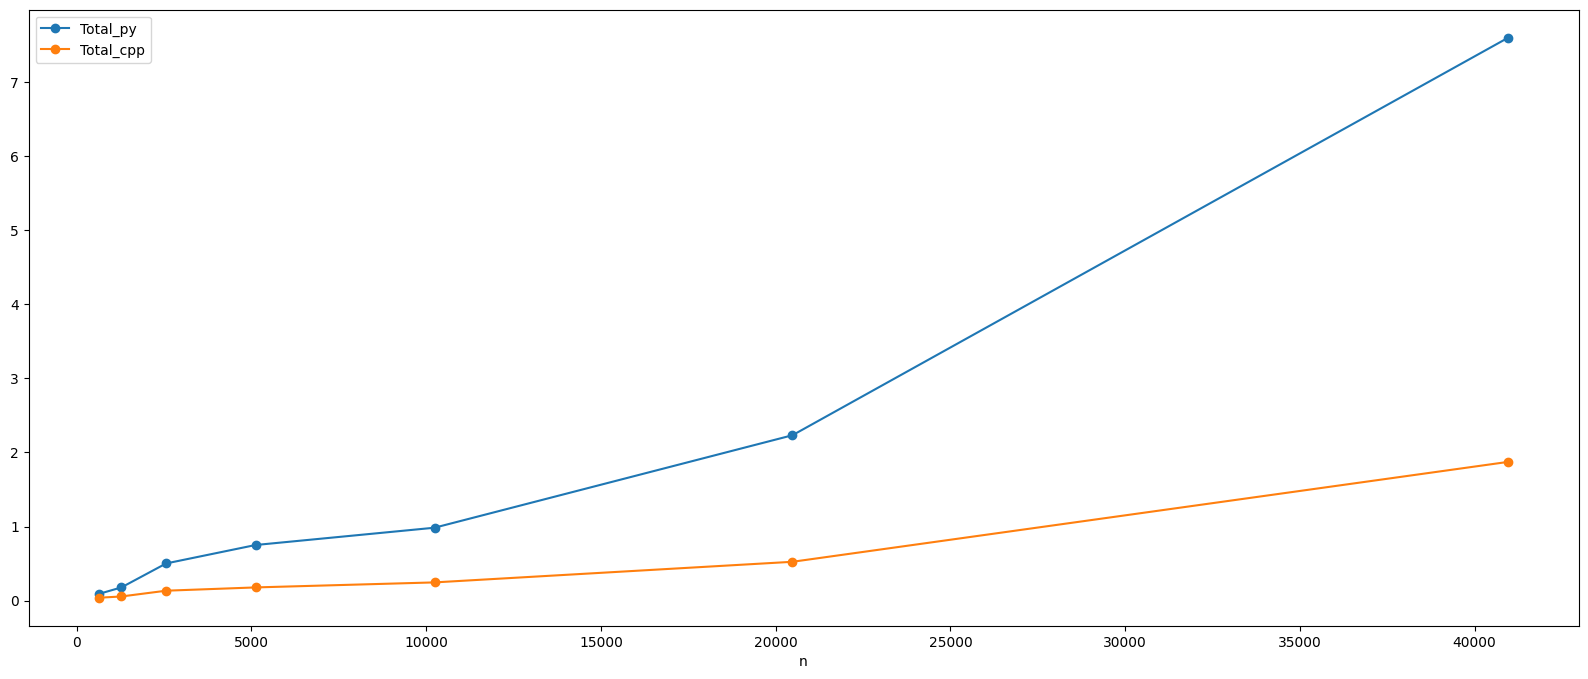

In [77]:
plot_column(comparison, ['Total_py', 'Total_cpp'], one_ax=True)

##### Compare nodesComputation

In [78]:
comparison.filter(regex="deltaNodesComputation")

,deltaNodesComputation_py,deltaNodesComputation_cpp
n,,
640,0.052806,0.018567
1280,0.135721,0.038500
2560,0.451079,0.116735
5120,0.669797,0.156818
10240,0.861013,0.212967
20480,2.042142,0.471955
40960,7.265151,1.808781


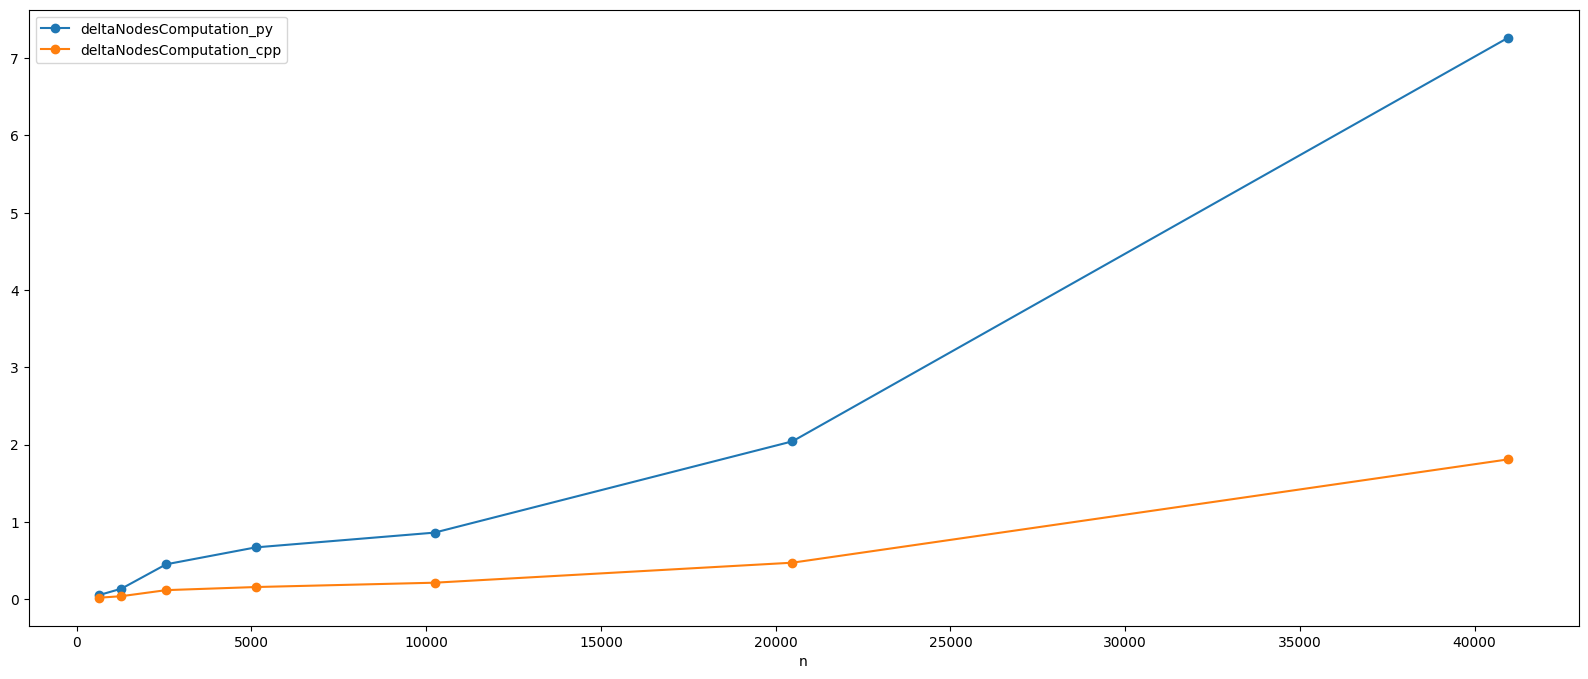

In [79]:
plot_column(comparison, ['deltaNodesComputation_py', 'deltaNodesComputation_cpp'], one_ax=True)

##### Compare deltaGLR

In [80]:
comparison.filter(regex="deltaGLR")

,deltaGLR_py,deltaGLR_cpp
n,,
640,0.026825,0.000942
1280,0.021476,0.001084
2560,0.024503,0.001642
5120,0.055722,0.002821
10240,0.077366,0.004886
20480,0.129475,0.012257
40960,0.253683,0.018703


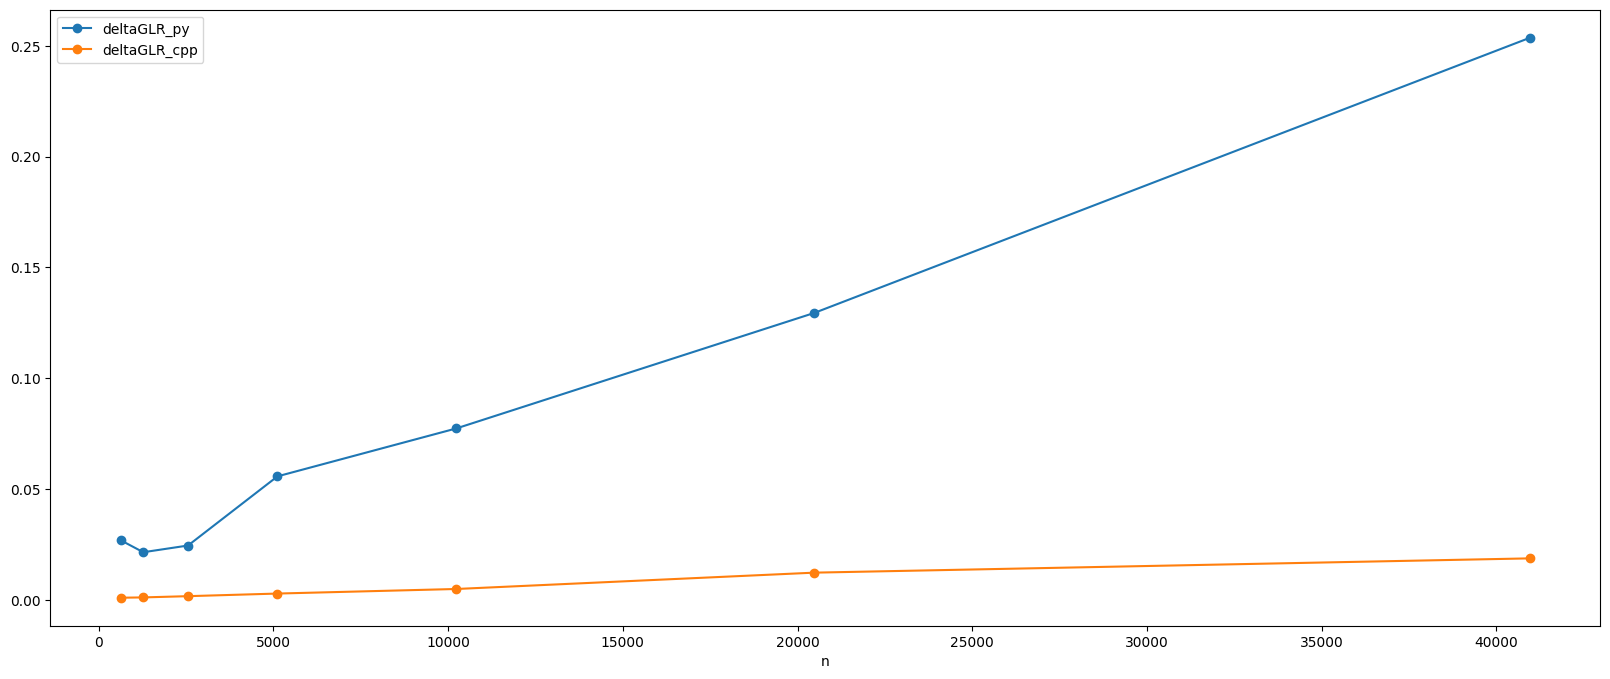

In [81]:
plot_column(comparison, ['deltaGLR_py', 'deltaGLR_cpp'], one_ax=True)

# Double Experiment (EXP6)

##### Filter results

In [82]:
dexpcommunityundirected = all_data[ all_data["Flag"] == "2expcommunityundirected"]
dexpcommunityundirected = dexpcommunityundirected[dexpcommunityundirected["Code"] == programming_language]

##### Set number of community as ID

In [83]:
def get_number_community(partition_name):
    partition_name = partition_name.split("/")[-1]
    partition_id = partition_name[len("partition"):]
    return int(partition_id)

dexpcommunityundirected["#community"] = dexpcommunityundirected['Partition'].apply(get_number_community)
dexpcommunityundirected.set_index("#community", inplace=True)
dexpcommunityundirected.sort_index(inplace=True)

##### Show total time

In [84]:
dexpcommunityundirected[["Total"]]

,Total
#community,
2,14.212054
4,1.348745
8,0.727738
16,0.506903
32,0.651209
64,1.082843
128,1.629769


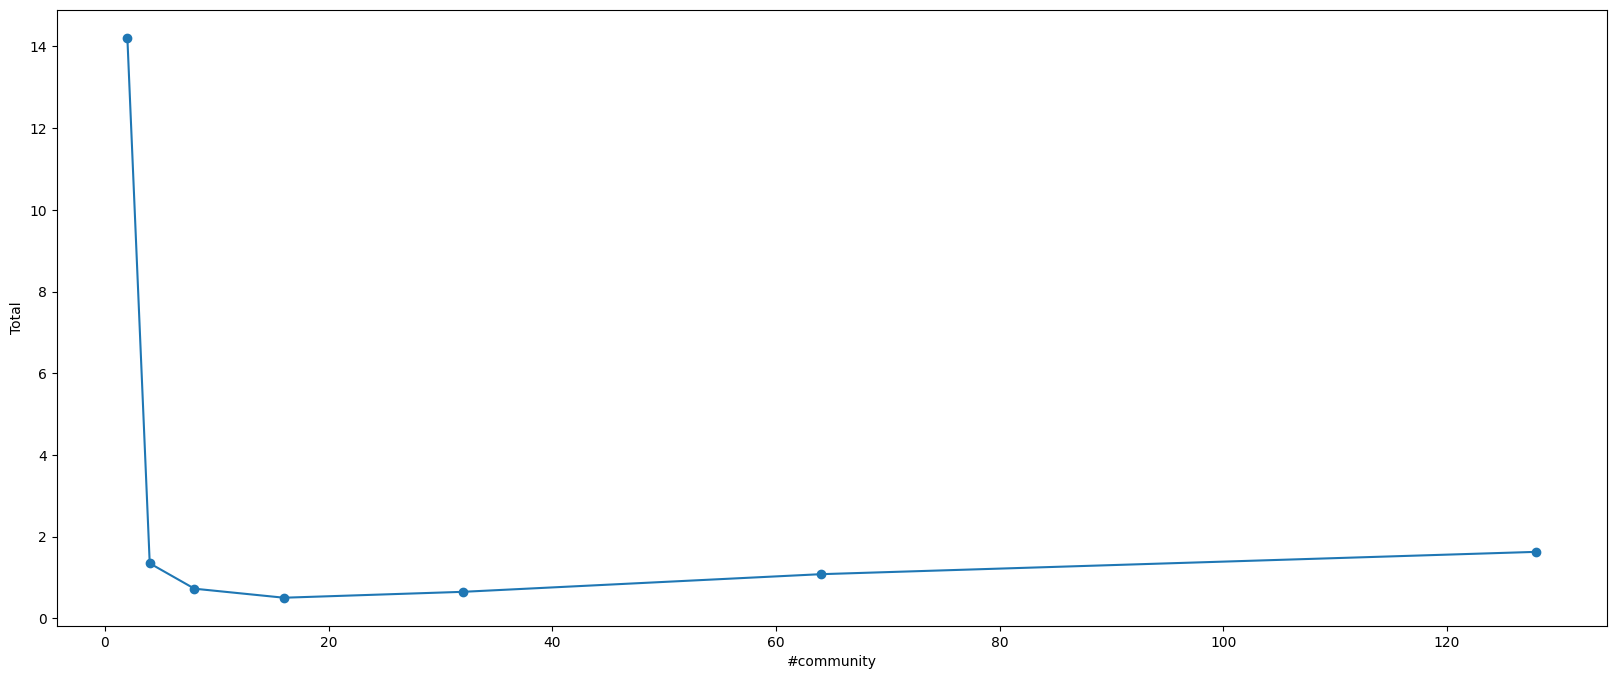

In [85]:
plot_column(dexpcommunityundirected, ["Total"])

##### Show nodesComputation

In [86]:
dexpcommunityundirected[["deltaNodesComputation"]]

,deltaNodesComputation
#community,
2,14.181469
4,1.327609
8,0.688742
16,0.444646
32,0.549577
64,0.928364
128,1.340588


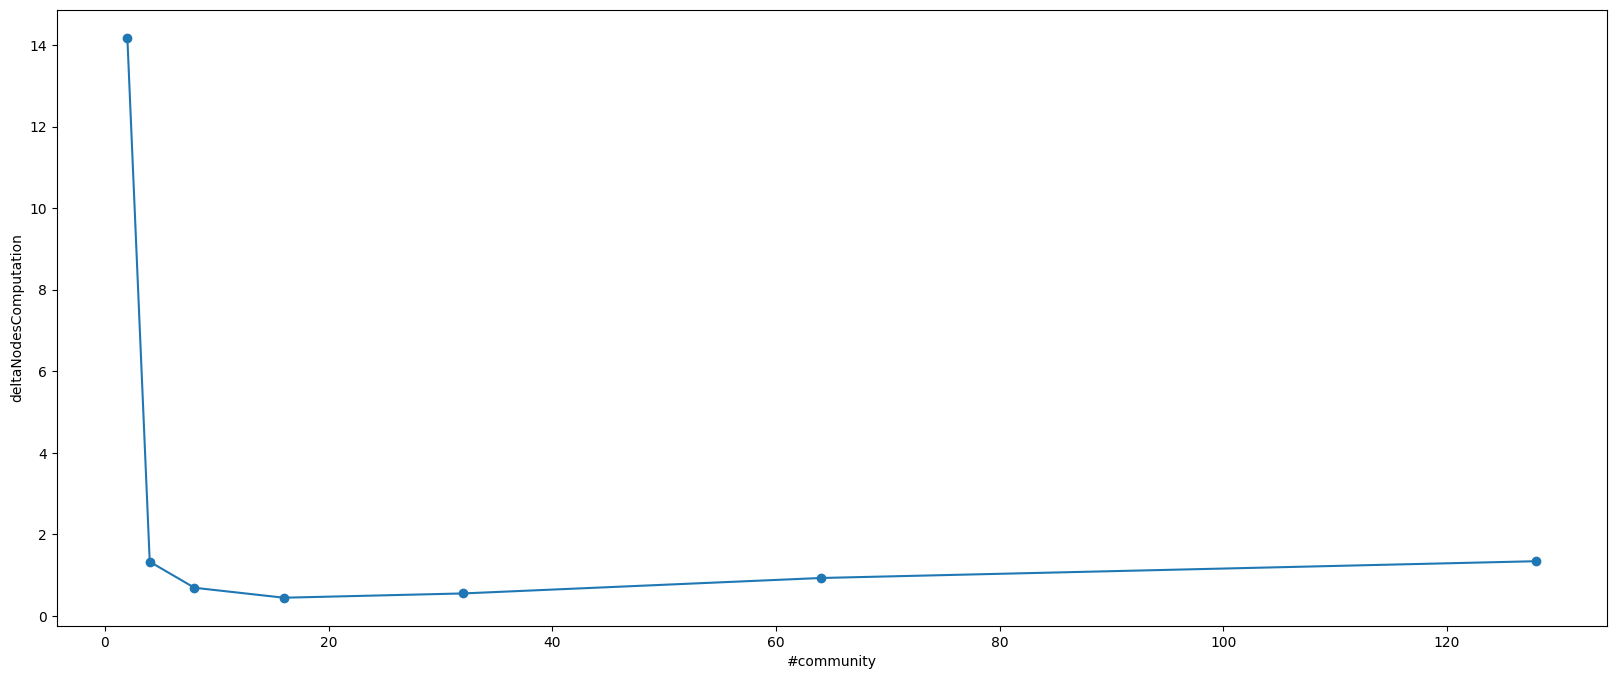

In [87]:
plot_column(dexpcommunityundirected, ["deltaNodesComputation"])

##### Show deltaGLR

In [88]:
dexpcommunityundirected[["deltaGLR"]]

,deltaGLR
#community,
2,0.004374
4,0.004242
8,0.007097
16,0.014598
32,0.028869
64,0.059167
128,0.117562


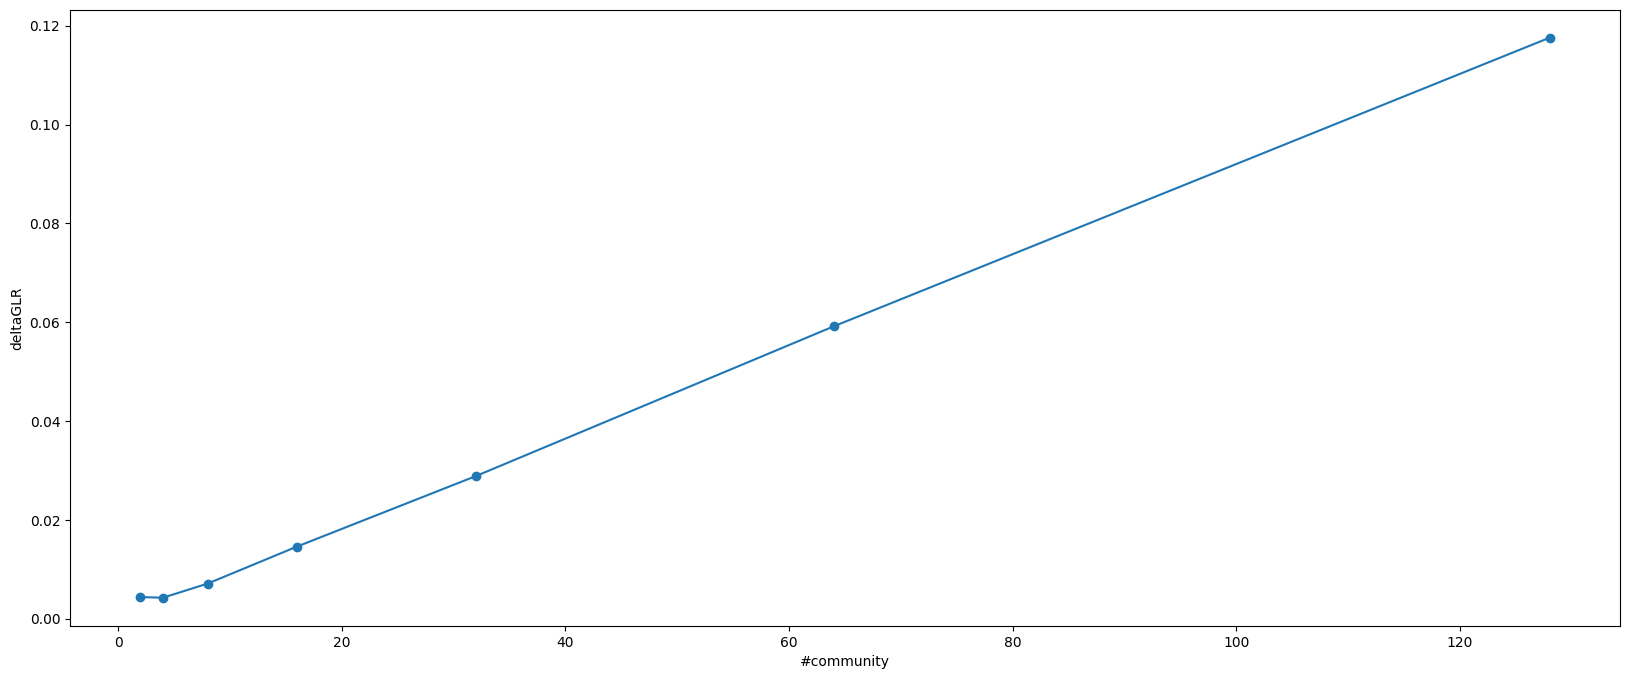

In [89]:
plot_column(dexpcommunityundirected, ["deltaGLR"])

# Double Experiment (EXP7)

##### Filter results

In [90]:
dexpedgeundirected = all_data[ all_data["Flag"] == "2expedgeundirected"]
dexpedgeundirected = dexpedgeundirected[dexpedgeundirected["Code"] == programming_language]

##### Set number of edges as ID

In [91]:
dexpedgeundirected.set_index("m", inplace=True)
dexpedgeundirected.sort_index(inplace=True)

##### Show total time

In [92]:
dexpedgeundirected[["Total"]]

,Total
m,
639,0.022667
1278,0.020512
2556,0.020234
5112,0.027413
10224,0.023793
20448,0.036056
40896,0.046401
81792,0.068138
163584,0.052599


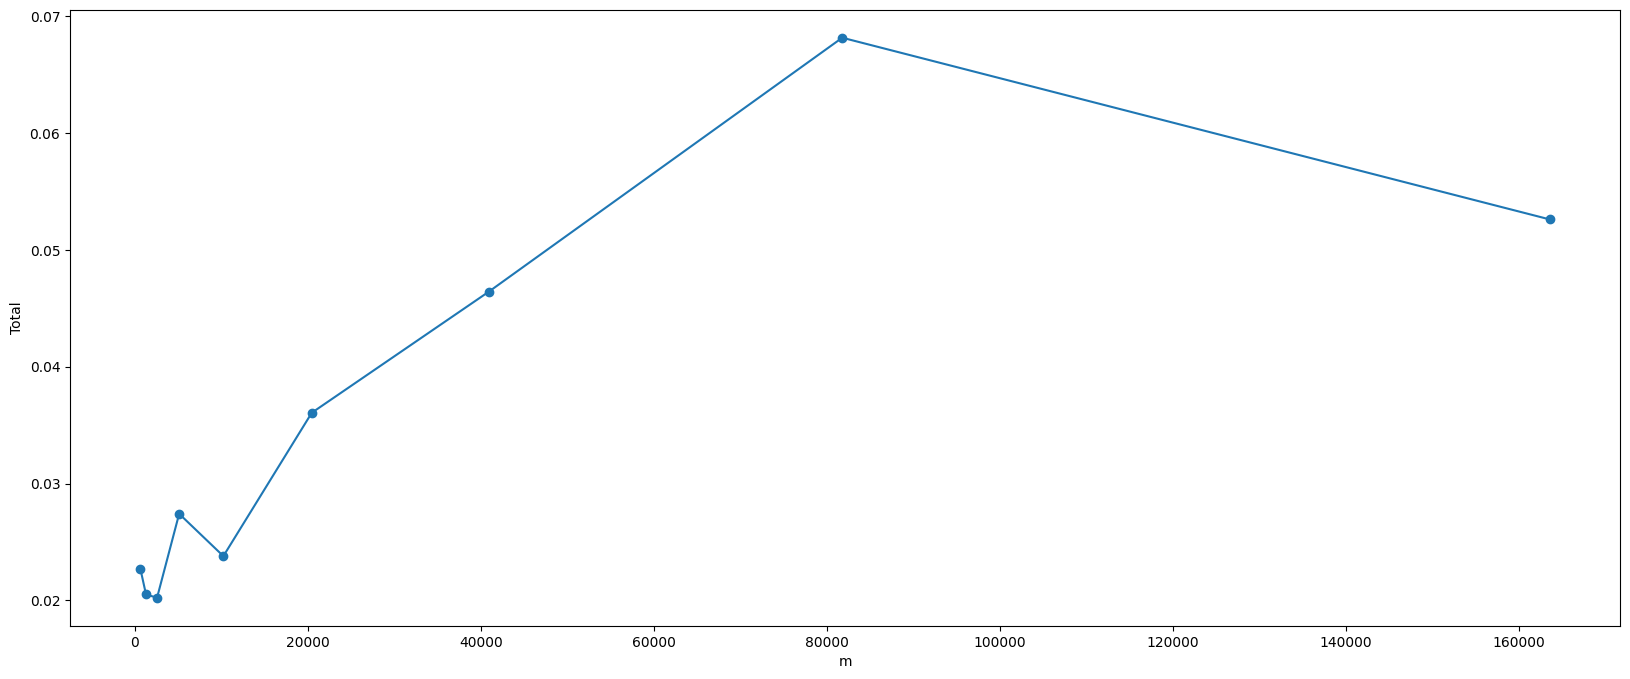

In [93]:
plot_column(dexpedgeundirected, ["Total"])

##### Show partitionsComputation

In [94]:
dexpedgeundirected[["Community computation"]]

,Community computation
m,
639,0.016896
1278,0.016543
2556,0.017139
5112,0.017635
10224,0.018455
20448,0.020879
40896,0.026110
81792,0.045643
163584,0.026696


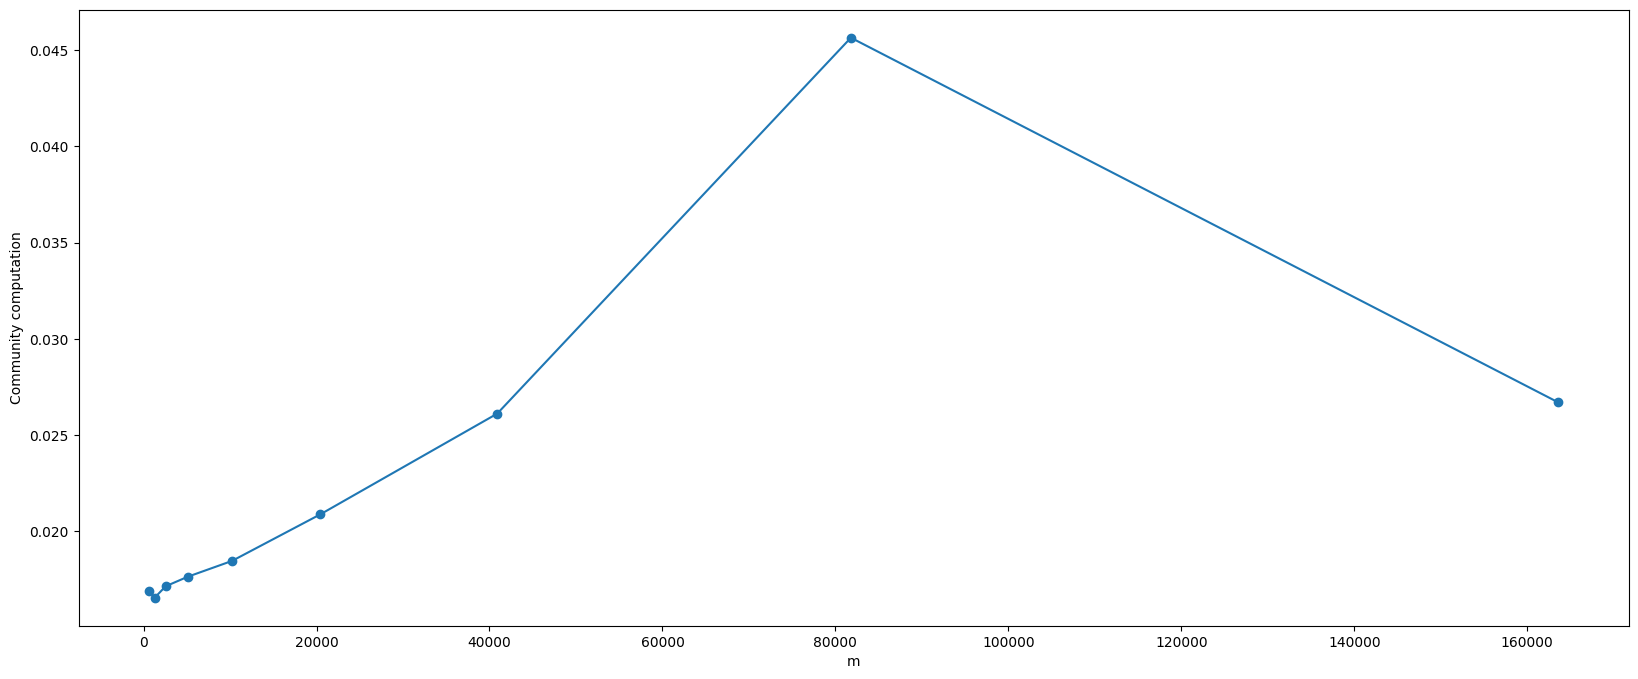

In [95]:
plot_column(dexpedgeundirected, ["Community computation"])

##### Show nodesComputation

In [96]:
dexpedgeundirected[["deltaNodesComputation"]]

,deltaNodesComputation
m,
639,0.005407
1278,0.003650
2556,0.002813
5112,0.009494
10224,0.005016
20448,0.014748
40896,0.019618
81792,0.021287
163584,0.024435


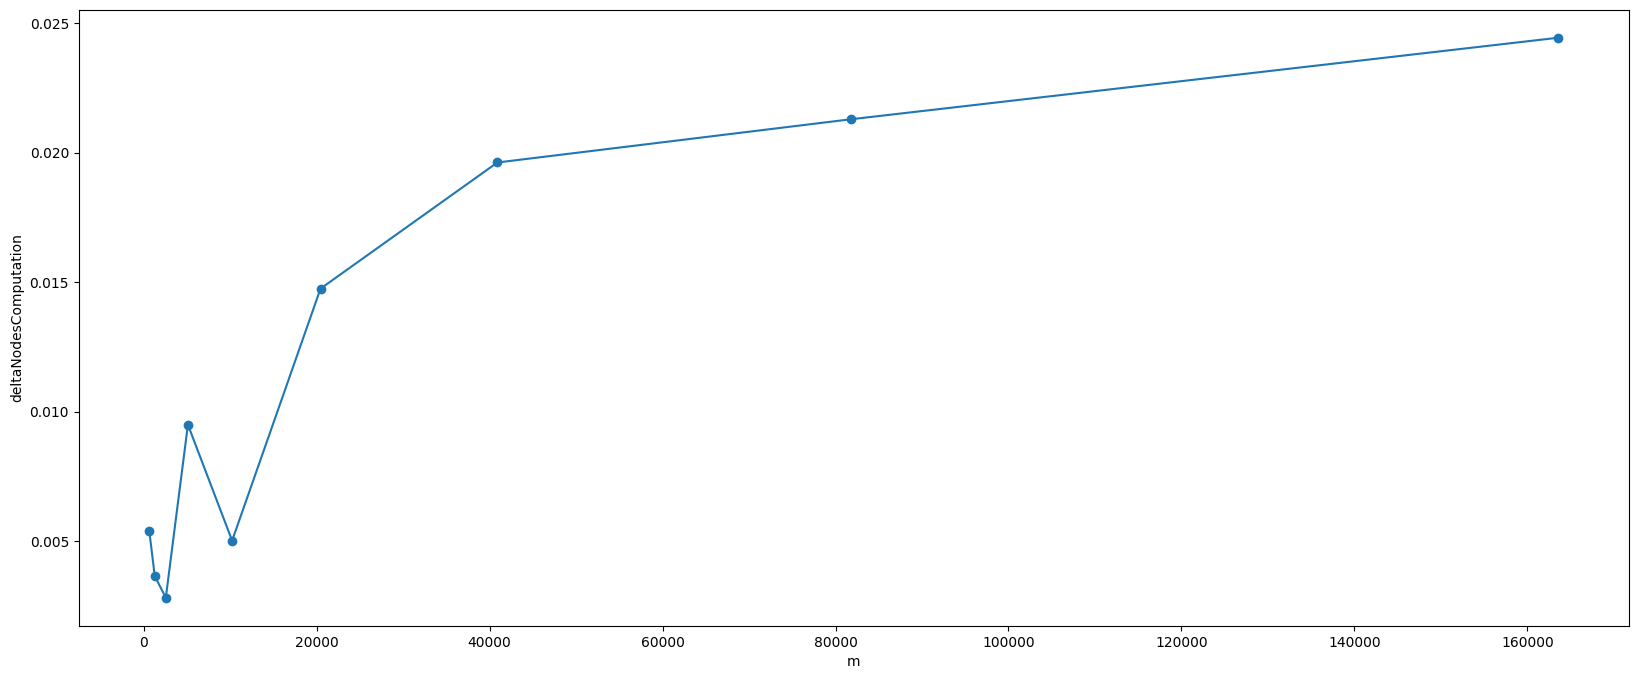

In [97]:
plot_column(dexpedgeundirected, ["deltaNodesComputation"])

##### Show deltaGLR

In [98]:
dexpedgeundirected[["deltaGLR"]]

,deltaGLR
m,
639,0.000335
1278,0.000294
2556,0.000263
5112,0.000268
10224,0.000305
20448,0.000416
40896,0.000658
81792,0.001190
163584,0.001452


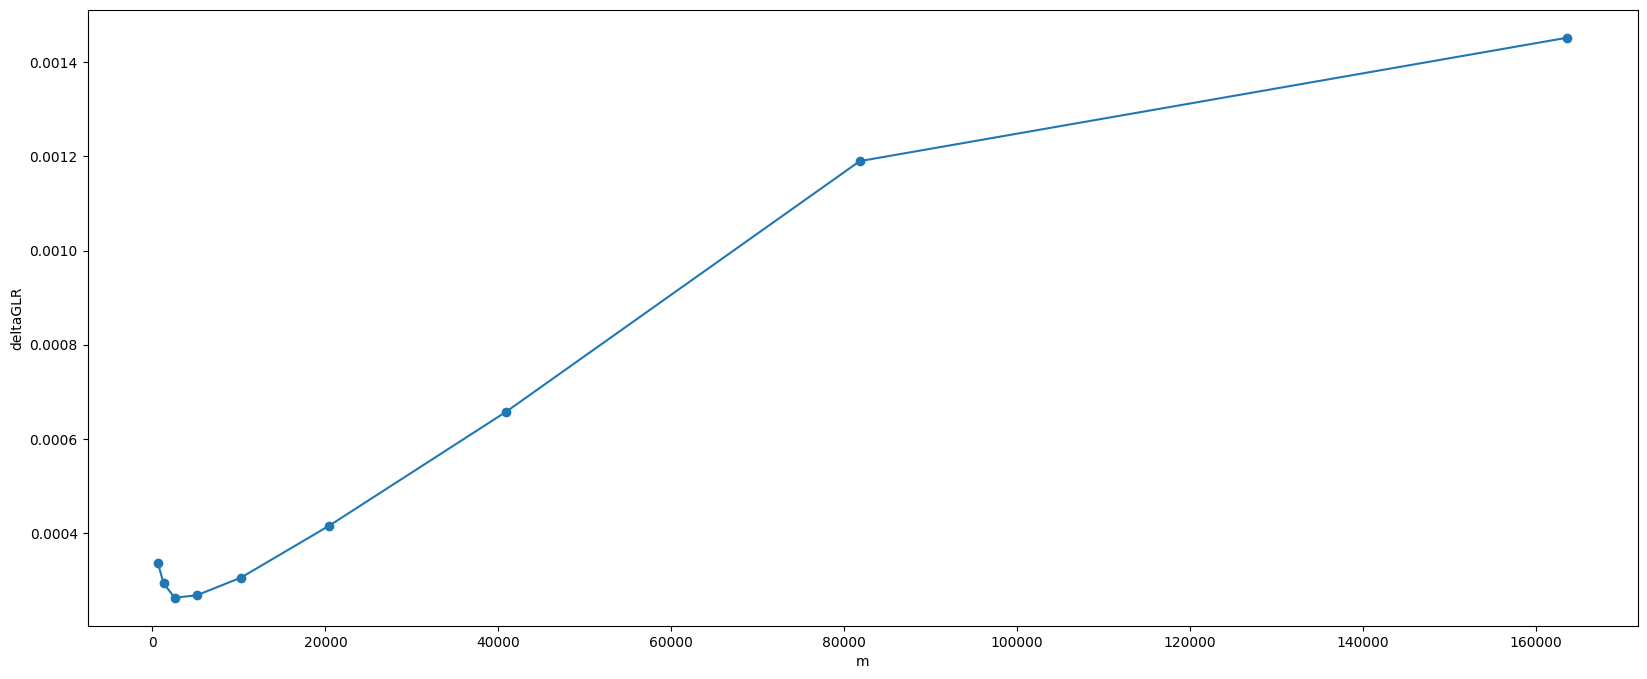

In [99]:
plot_column(dexpedgeundirected, ["deltaGLR"])